# **INTRO TO ML PROJECT GROUP 12**

**Group Members:**

A Sai Praneeth - 2302324

Harshitha Kesani - 2279919

Keerthi Priya Veerapalli - 2308035

Keerthi Yadav Eeraboina - 2311912

### **EMPLOYEE ATTRITION PREDICTION**

**WHAT IS OUR TARGET VARIABLE**

Here our target variable is Attrition.In this project , We want to predict whether an employee leaves the organization or not  based upon on the available features.

In [ ]:
# Installing Tensorflow
!pip install --upgrade tensorflow


Importing Necessary Libraries

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import scipy



In this Project we have used the IBM HR Employee Prediction dataset.

**DATA COLLECTION**

Data Collection is a Process of collecting all the datasets that are required for the project and then loading them.

**Loading the dataset**

In [ ]:
# Importing data from CSV files
data = pd.read_csv("/content/ml_data.csv", delimiter=',')
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
# Displaying basic information about the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 1470 rows and 35 features in our dataset.

In [ ]:
# Displaying the Statistics for all the numerical columns
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

The above code shows the statistical description of all the features.

**DATA PREPROCESSING**

**Dropping Irrelevent columns**

Visualizing Features through Histogram to get relavent information to do data preprocessing

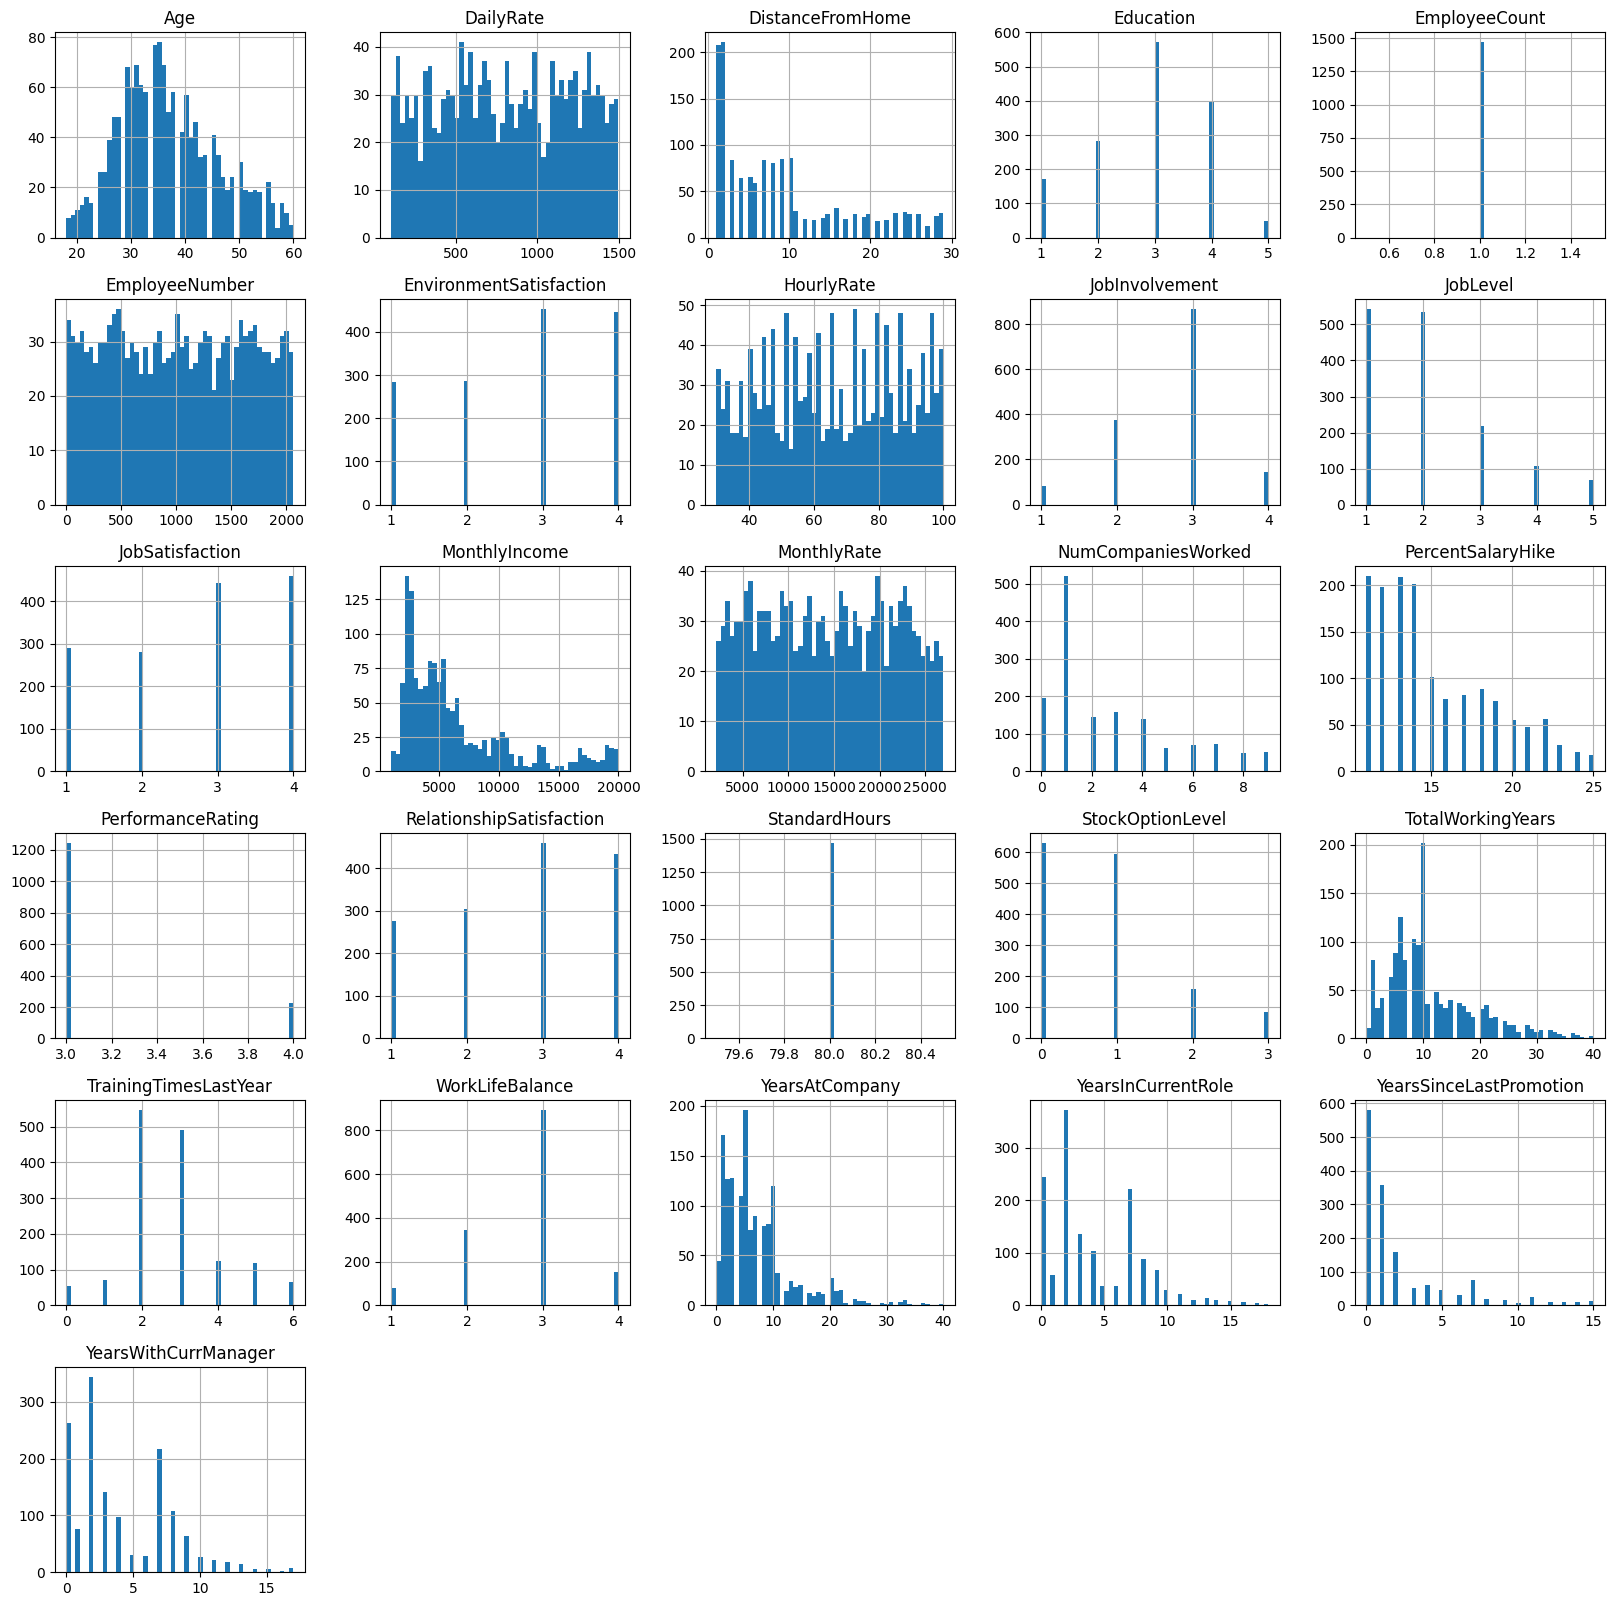

In [ ]:
# Histogram of the numerical features
data.hist(bins=50, figsize=(20,20))
plt.show()

From the above Histogram we can observe that the columns 'Over18', 'EmployeeCount', and 'StandardHours' have just one value fo the entire dataset. Hence we are dropping them .

The column 'EmployeeNumber' is the Employee ID of each employee, hence this value should not have any impact on our prediction and is therefore dropped as well.

In [ ]:
#Dropping the mentioned irrelevent columns
data = data.drop('Over18', axis = 1)
data = data.drop('EmployeeCount', axis = 1)
data = data.drop('EmployeeNumber', axis = 1)
data = data.drop('StandardHours', axis = 1)

In [ ]:
# Listing the basic information about th remaining columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
# Printing the shape of the dataframe after dropping the unnecessary columns
data.shape

(1470, 31)

After dropping the unnecessary columns the size of our data is (1470 , 31).

**Checking for Missing Values**

In [ ]:
# Checkign for missing values the Dataset
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


From the above output we can see that there are no missing values in the dataset.

**Checking for Duplicates**

In [ ]:
#Checking for duplicate rows in the dataset
duplicate_rows = data.duplicated()

# Printing the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


Here , We can see that our dataset has no duplicate values. So, there is no need to drop any records.

The next step in Data Preprocessing is to remove ouliers. Because, Outliers skew the data and lead to faulty predictions.

**Checking for outliers**

In [ ]:
# List of all the relavent numerical columns in the dataset
columns = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

Here , We are plotting the BoxPlot to visulaize outliers present in the data.

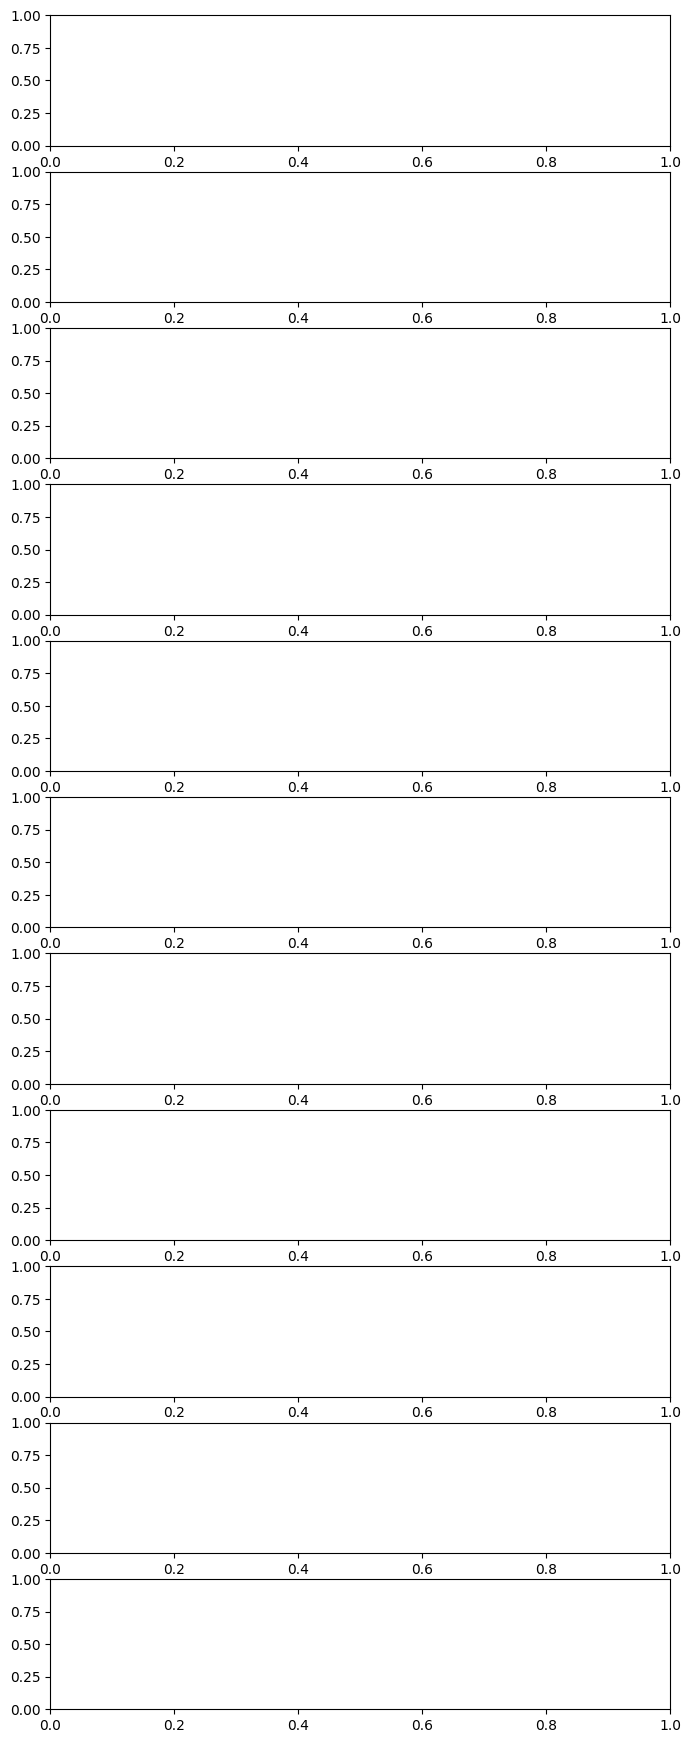

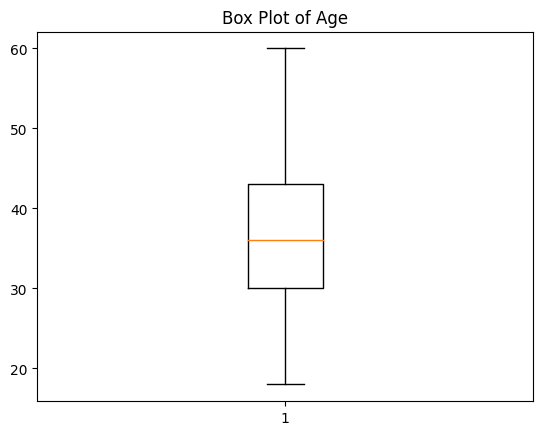

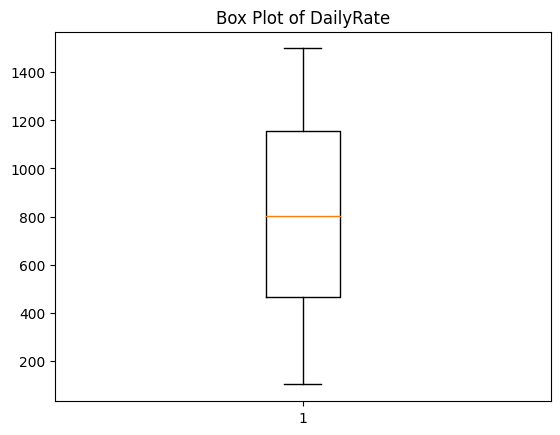

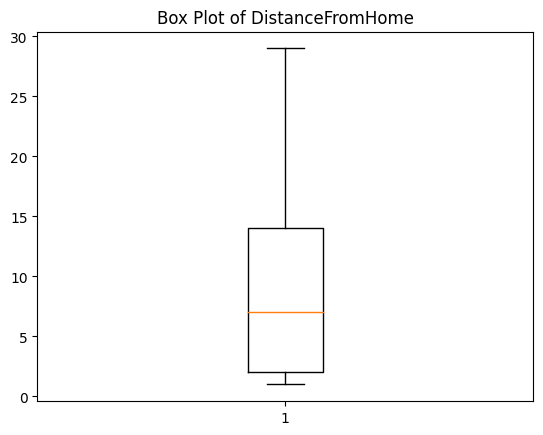

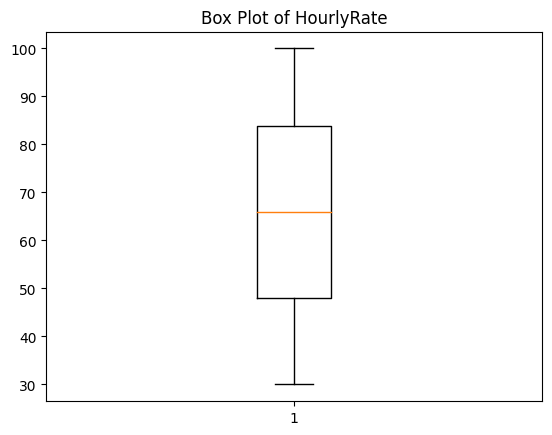

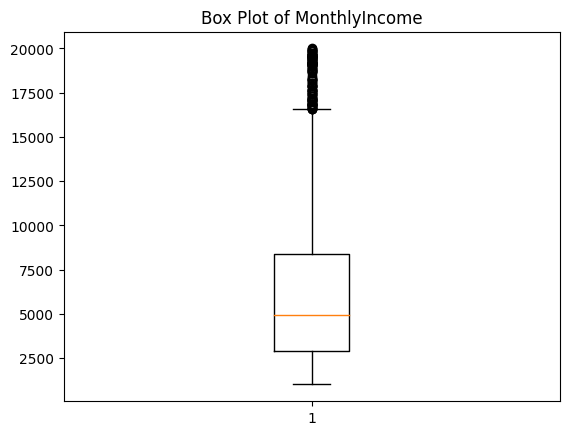

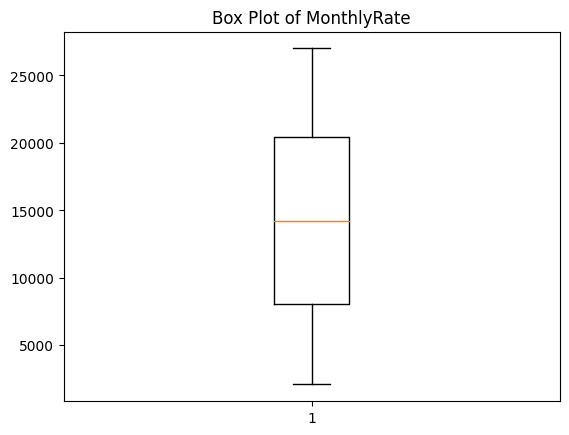

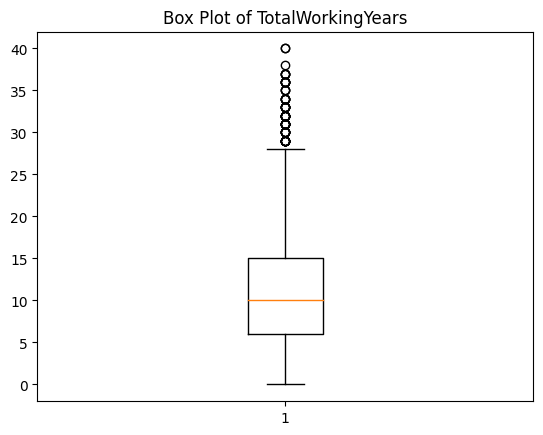

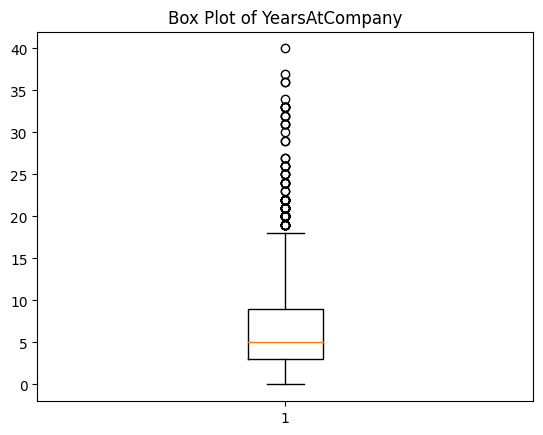

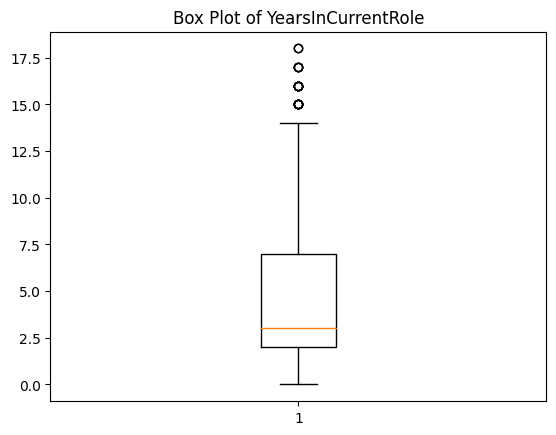

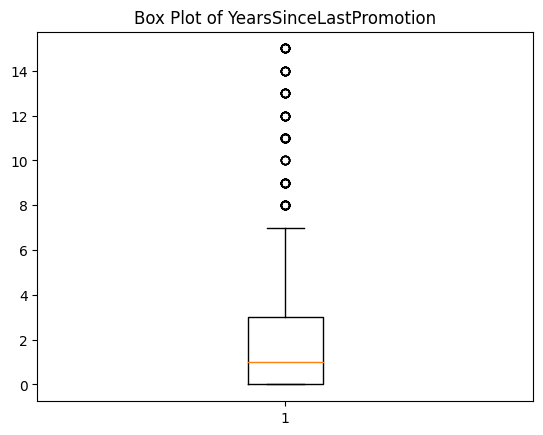

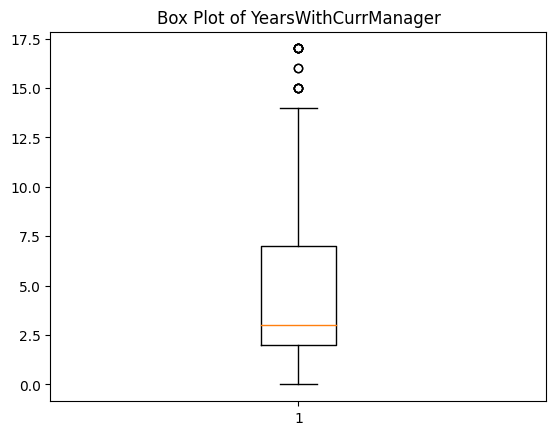

In [ ]:
df = data
# Set up subplots
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 2*len(columns)))

for i in columns:
  # Plotting the BoxPlot to visulaize the outliers in the numerical features
  plt.figure()
  plt.boxplot(df[i])
  plt.title(f'Box Plot of {i}')

From the above boxplots we can see that some of the columns have outliers. To offset their impact we are using the IQR method handle these outliers.

**Removing Ouliers in those Columns**

In [ ]:
import statsmodels

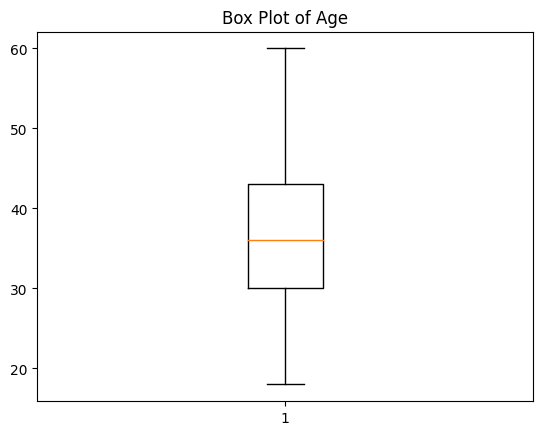

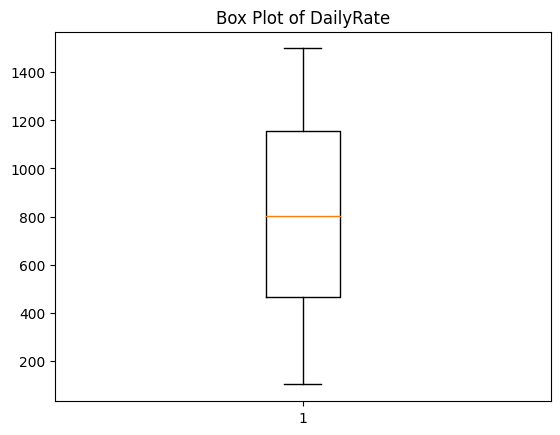

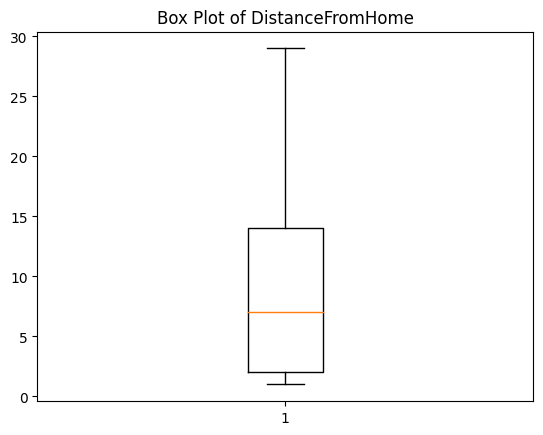

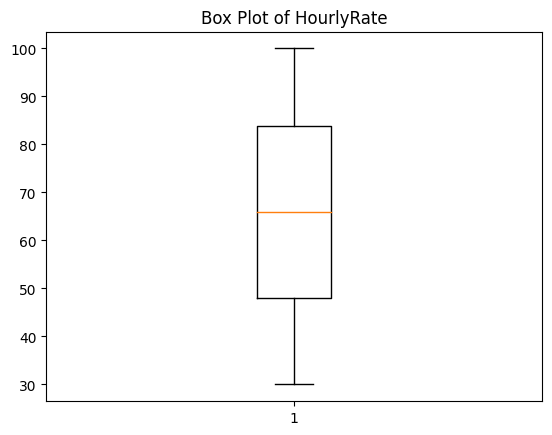

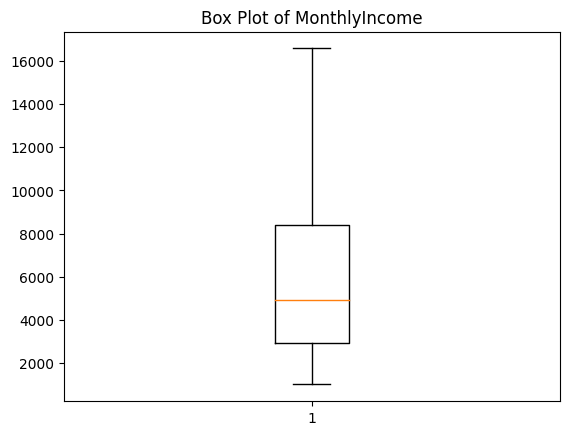

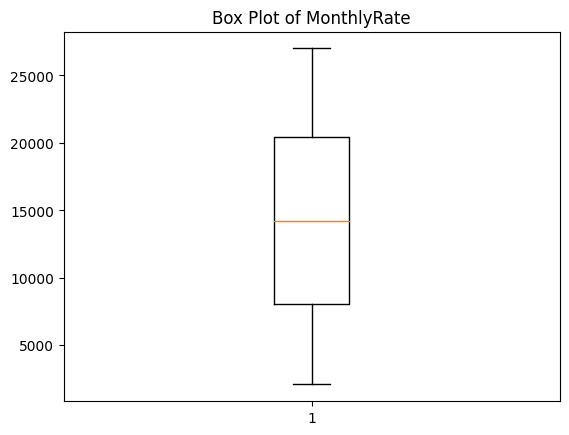

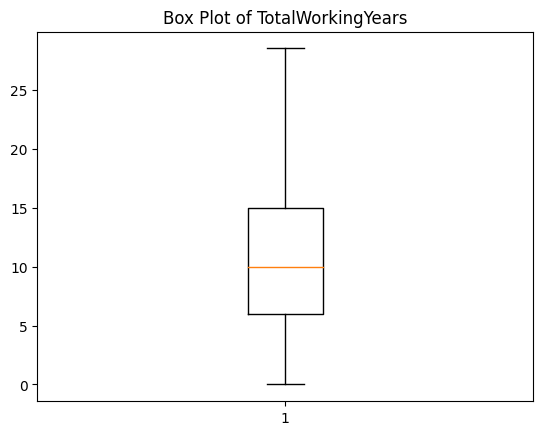

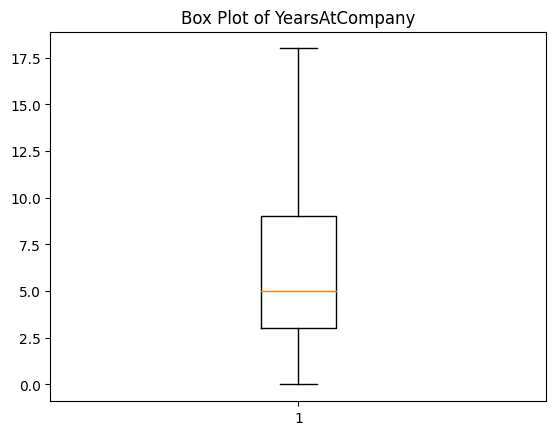

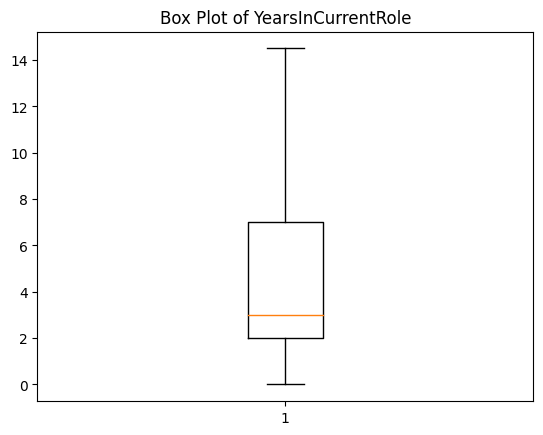

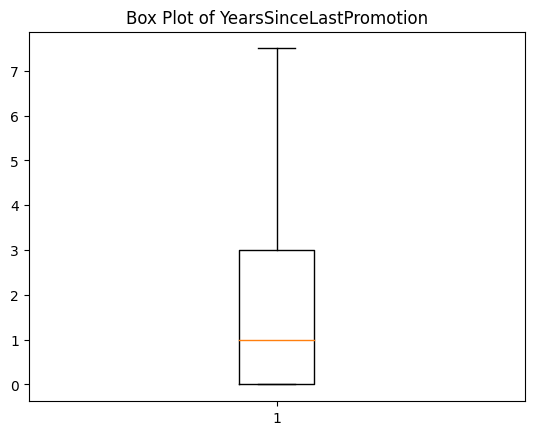

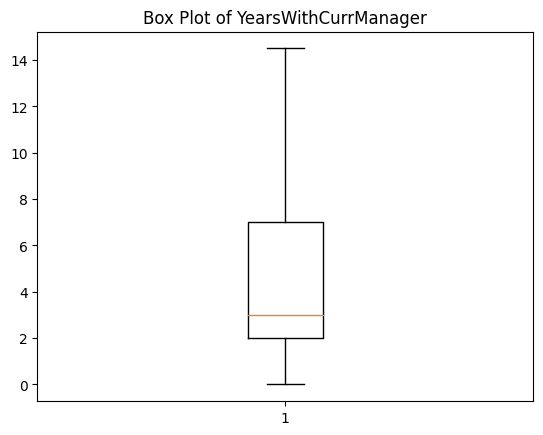

In [ ]:
#Removing Outliers using IQR Method

for i in columns:
  Q1 = df[i].quantile(.25)
  Q3 = df[i].quantile(.75)
  IQR = Q3 -Q1
  lb = Q1 - 1.5*IQR
  ub = Q3 + 1.5*IQR
  df[i] = np.clip(df[i].to_numpy(), lb, ub)
  plt.figure()
  plt.boxplot(df[i])
  plt.title(f'Box Plot of {i}')

From the above boxplot we can see  that all the ouliers have been removed using IQR Method.

In [ ]:
df.shape

(1470, 31)

**Encoding Categorical Variables**

In this step we are encoding the categorical variables to numeric form to facilitate the use of machine learning and neural network models.

In [ ]:
# Convert binary categorical variables to numeric form

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})
df["OverTime"] = df["OverTime"].map({"Yes": 1, "No": 0})
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [ ]:
# Assigning the dataframe at the current stage to a variable to facilitate exploratory data analysis.
data1 = df

In [ ]:
# List of non binary categorical columns
columns_to_encode = ["BusinessTravel", "Department", "MaritalStatus", "EducationField", "JobRole"]

# Using get_dummies to perform one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)

# Printing the first few rows of the new dataset
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0  41.0          1     1102.0               1.0          2   
1  49.0          0      279.0               8.0          1   
2  37.0          1     1373.0               2.0          2   
3  33.0          0     1392.0               3.0          4   
4  27.0          0      591.0               2.0          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2       0        94.0               3         2  ...   
1                        3       1        61.0               2         2  ...   
2                        4       1        92.0               2         1  ...   
3                        4       0        56.0               3         1  ...   
4                        1       1        40.0               3         1  ...   

   EducationField_Technical Degree  JobRole_Healthcare Representative  \
0                                0                                  0   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 50 columns]

In [ ]:
df.shape

(1470, 50)

The shape of our data after Encoding the data is (1470 , 50 )

**Selecting the Important Features/Feature Scaling**

In [ ]:


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap for better visualization
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

# print(correlation_matrix['Attrition'])

# Set a correlation threshold (e.g., 0.3)
correlation_threshold = 0.1

# Select features with correlation above the threshold
selected_features = correlation_matrix['Attrition'][abs(correlation_matrix['Attrition']) > correlation_threshold].index.tolist()

# Display the selected features
print("Selected Features:", selected_features)
print(len(selected_features))

Selected Features: ['Age', 'Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'MaritalStatus_Single', 'JobRole_Sales Representative']
16


We got 16 Imporatant Features as shown above from the overall features of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   float64
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   float

**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Scatterplot of Age vs Momthly Income by Attrition

import plotly.express as px


fig = px.scatter(data1, x="Age", y="MonthlyIncome", color="Attrition", trendline="ols")

fig.update_layout(title="Age vs. Monthly Income by Attrition")

fig.show()

The scatterplot above illustrates the correlation between employee's ages and monthly revenue. It is evident that monthly income increases with a person's age. The staff members with low monthly salaries, have a high attrition rate.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



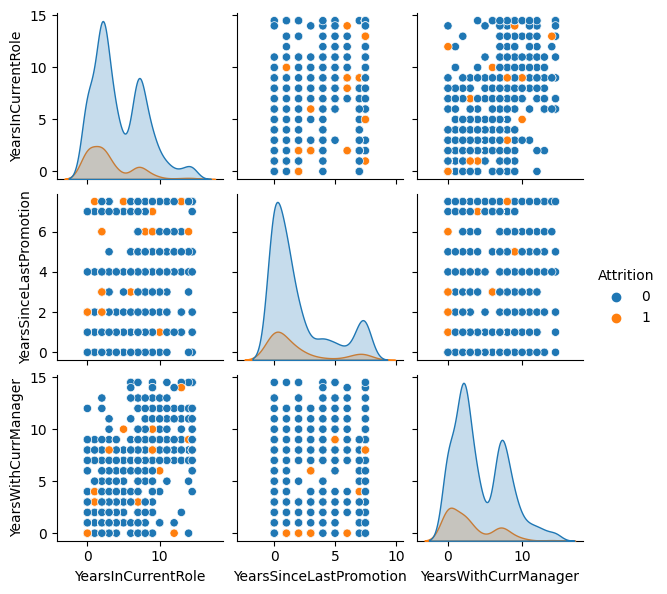

In [ ]:
#pairplot
sns.pairplot(data1.iloc[:,[1,28,29,30]], hue='Attrition', size=2)

The above visualization is a pairplot between selected variables.
In a pair plot, we have the capability to visualize multiple variables simultaneously.

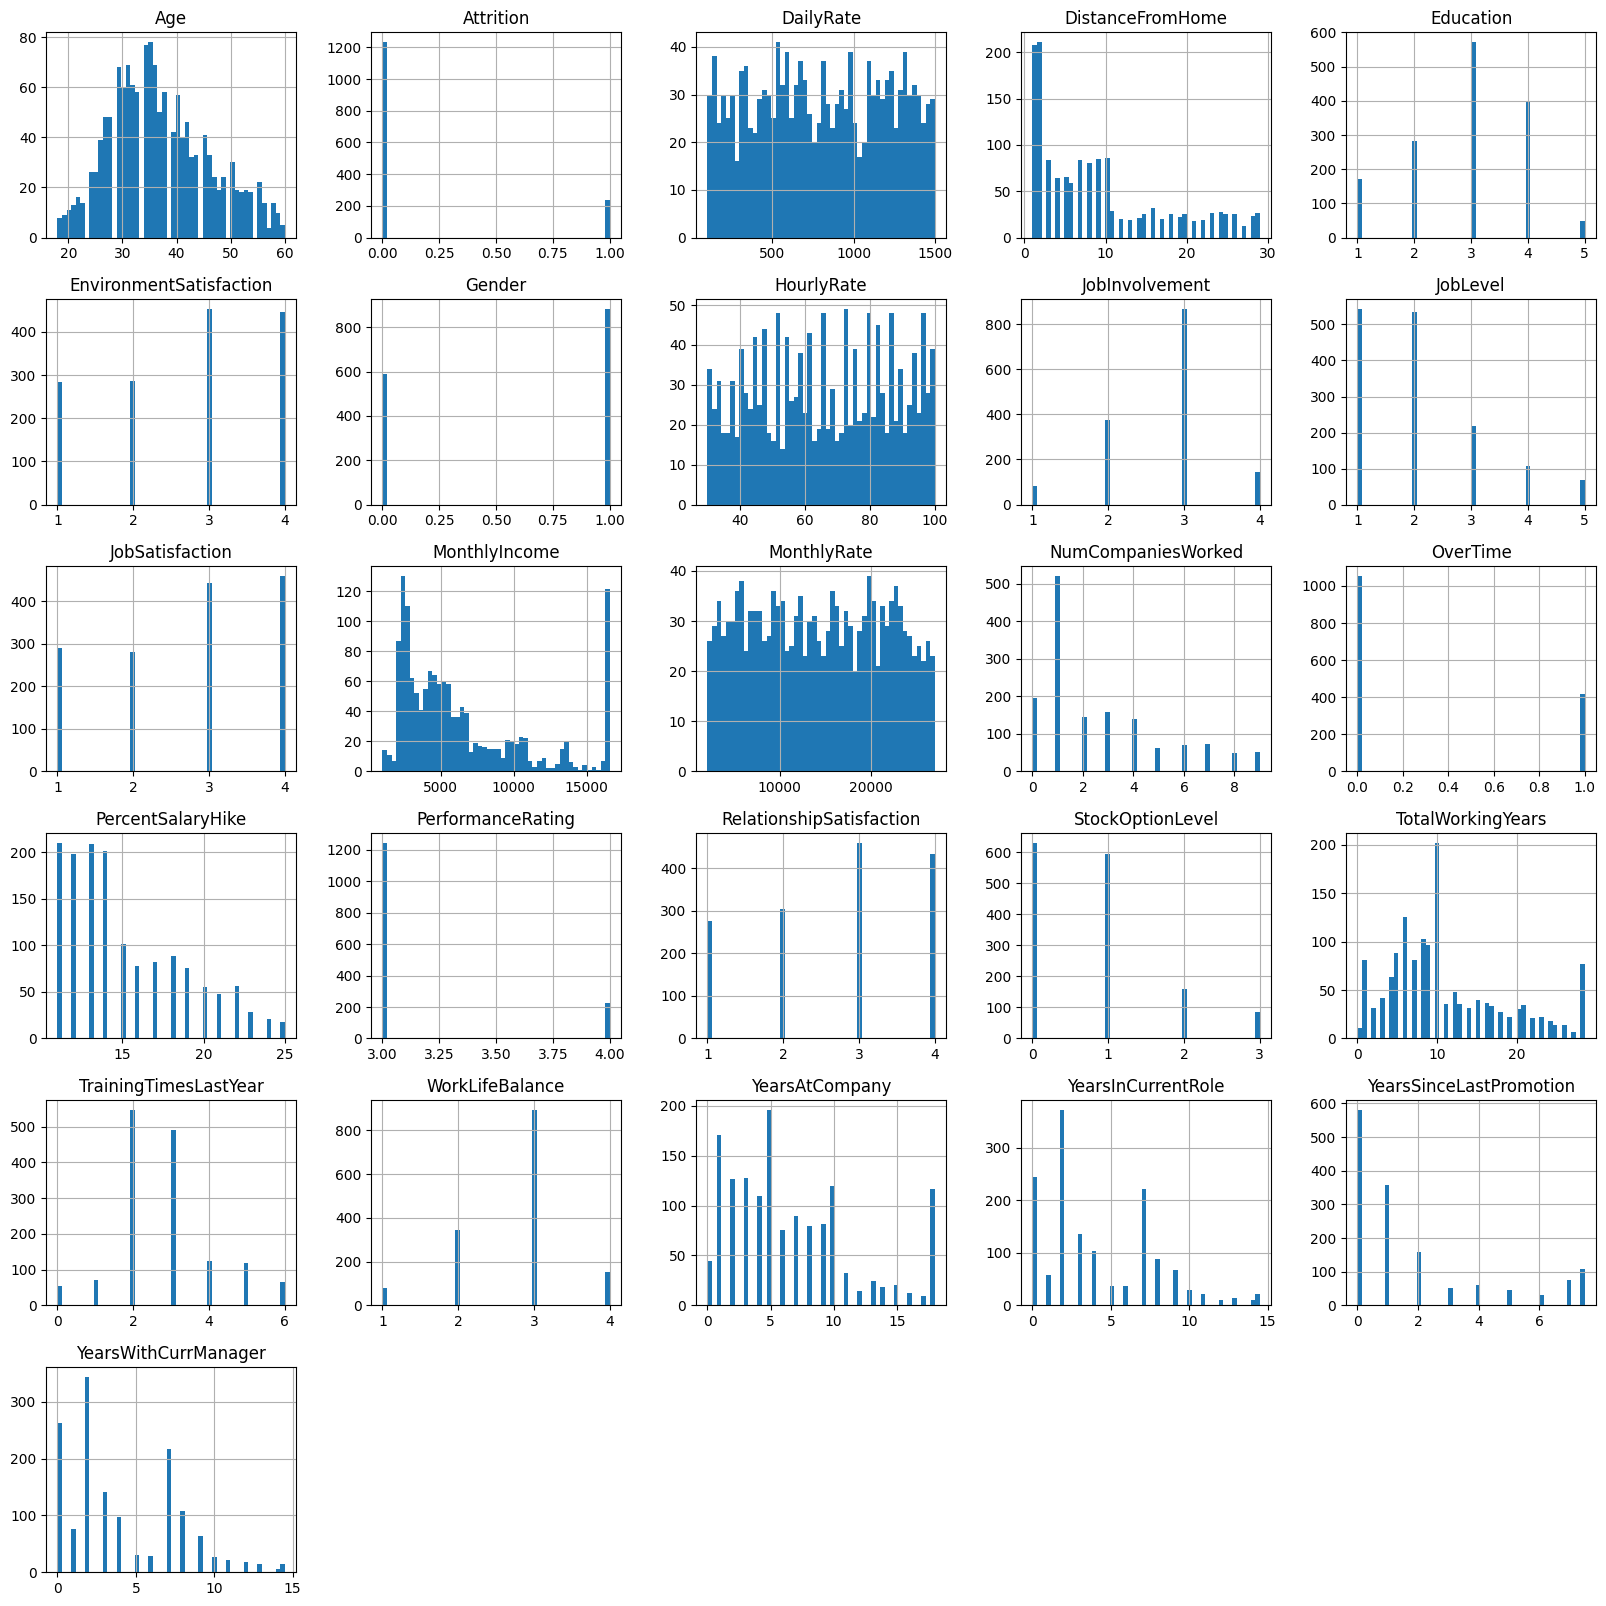

In [ ]:
# Histogram of the numerical features
data1.hist(bins=50, figsize=(20,20))
plt.show()

From the above histogram we can depict that we have categorical and numerical columns in our dataset.

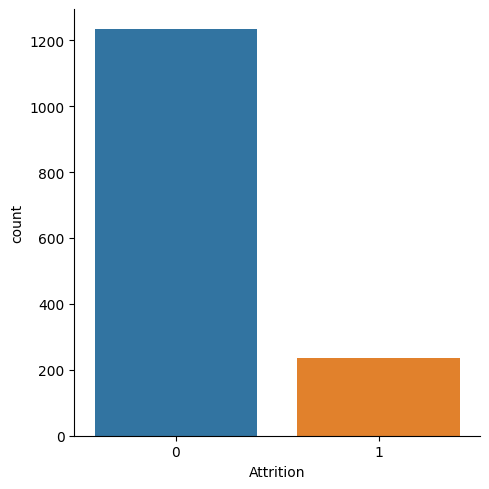

In [ ]:
# Visualizing the Target Variable('Attrition')
sns.catplot(data=data1,x="Attrition",kind='count')

The above barchart shows the count of employees who have the chance of leaving the company. We can see that approximately 250 employees have quit the job.

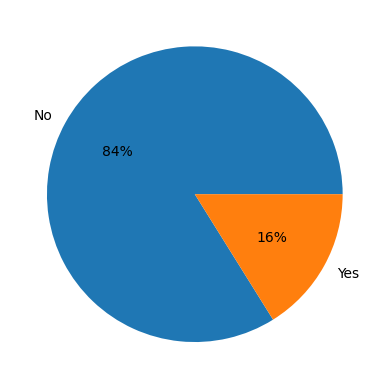

In [ ]:
#pie chart for attrition column
plt.pie(data1['Attrition'].value_counts(),labels=['No','Yes'],autopct='%.0f%%')
plt.show()

From the above pie chart we can depict that 16% of workers left the company, however 84% of employees chose not to leave.

Text(0.5, 1.0, 'Stacked Bar Chart of Job satisfaction vs attrition')

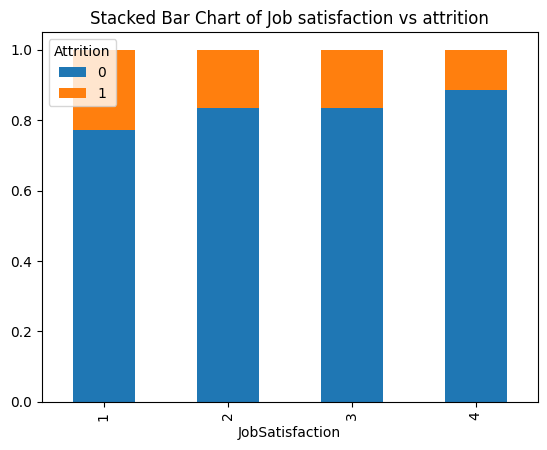

In [ ]:
# Stacked Bar Chart of Job satisfaction vs attrition
table=pd.crosstab(data1.JobSatisfaction, data1.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job satisfaction vs attrition')

The above barchart is between Job Satisfaction and attrition columns.From the above bar graph we can visulaize that employees who are going to quit the company have very less job satisfaction.

Text(0.5, 1.0, 'Stacked Bar Chart of Overtime vs attrition')

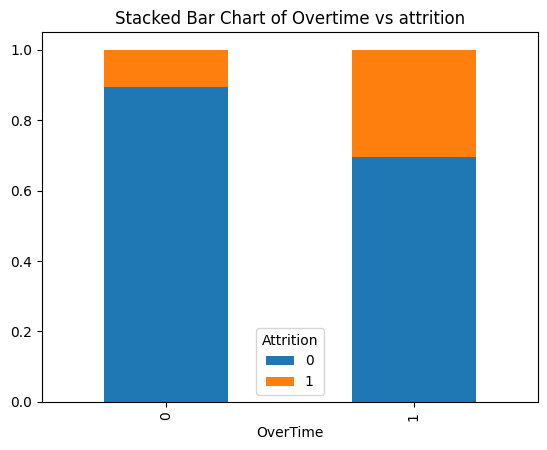

In [ ]:
#Stacked Bar Chart between Overtime and attrition columns
table=pd.crosstab(data1.OverTime, data1.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Overtime vs attrition')

The above plot is between Overtime and Attrition columns.From the above plot we can depict that most of the employees who are working overtime are tend to quit the company.

Text(0.5, 1.0, 'Stacked Bar Chart of YearsSinceLastPromotion vs attrition')

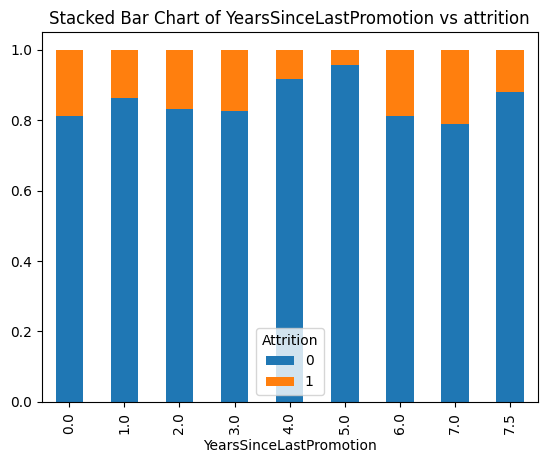

In [ ]:
#Stacked Bar Chart of YearsSinceLastPromotion vs attrition
table=pd.crosstab(data1.YearsSinceLastPromotion, data1.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of YearsSinceLastPromotion vs attrition')

The above stacked bar graph is between promotion and attrition.

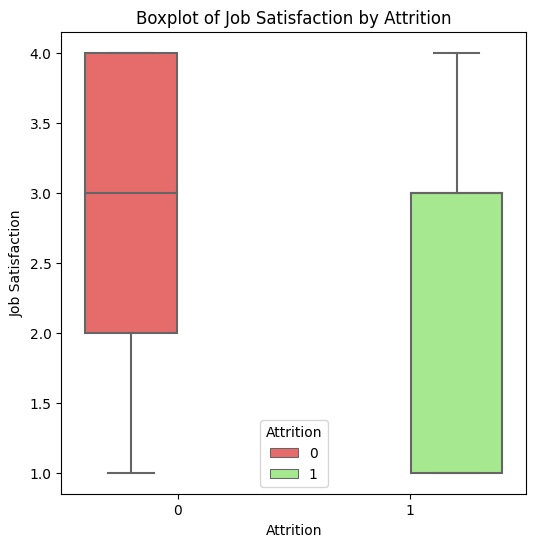

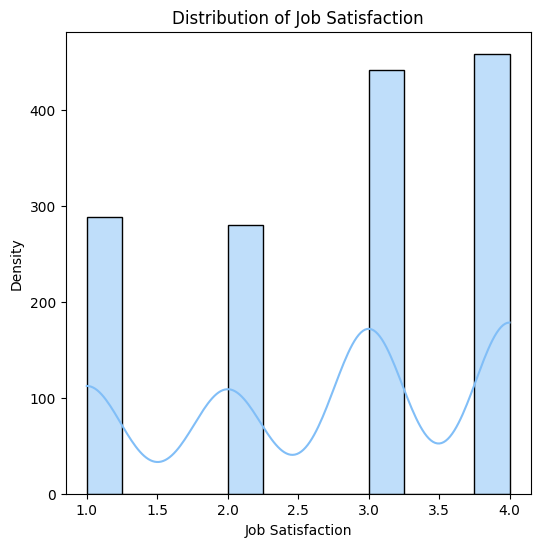

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seting plot size
plt.figure(figsize=(6,6))

# Boxplot with attrition on the X-axis and Job Satisfaction on the y-Axis
sns.boxplot(x='Attrition', y='JobSatisfaction', hue='Attrition', data=data1, palette=["#FA5858", "#9FF781"])
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.title('Boxplot of Job Satisfaction by Attrition')

# Distribution of Job Satisfaction
plt.figure(figsize=(6,6))
sns.histplot(data=data1, x='JobSatisfaction', color="#81BEF7", kde=True)
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.title('Distribution of Job Satisfaction')

# Display the plots
plt.show()


From the above plot we can depict that , For individuals who didn't leave the organization, job satisfaction levels are practically the same. However, for people who left the organization , females had a lower satisfaction level as opposed to males.

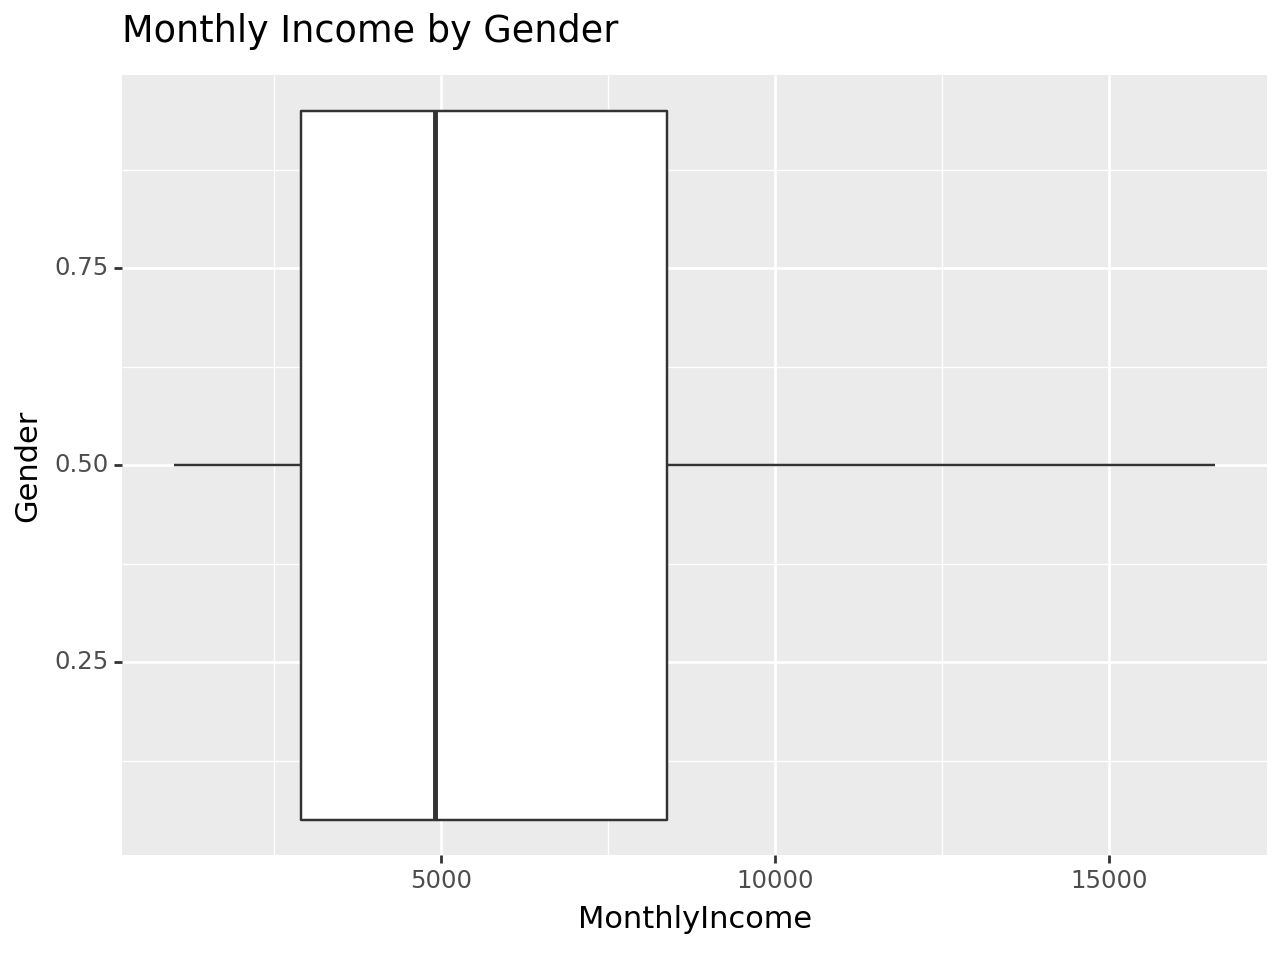

In [ ]:
#Monthly Income by Gender
from plotnine import ggplot, aes, geom_boxplot, scale_fill_manual, scale_color_manual, coord_flip, labs

# Create ggplot
p = (
    ggplot(data1, aes(x='Gender', y='MonthlyIncome', color='Gender', fill='Gender')) +
    geom_boxplot() +
    scale_fill_manual(values=["#F5A9F2", "#5882FA"]) +
    scale_color_manual(values=["#FE2EF7", "#5858FA"]) +
    coord_flip() +
    labs(title="Monthly Income by Gender")
)

# Show plot
print(p)



From the above box plot, it is evident that the average salaries for both genders are nearly identical. Males have an average salary of 6380.51, while females have an average salary of 6686.57.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

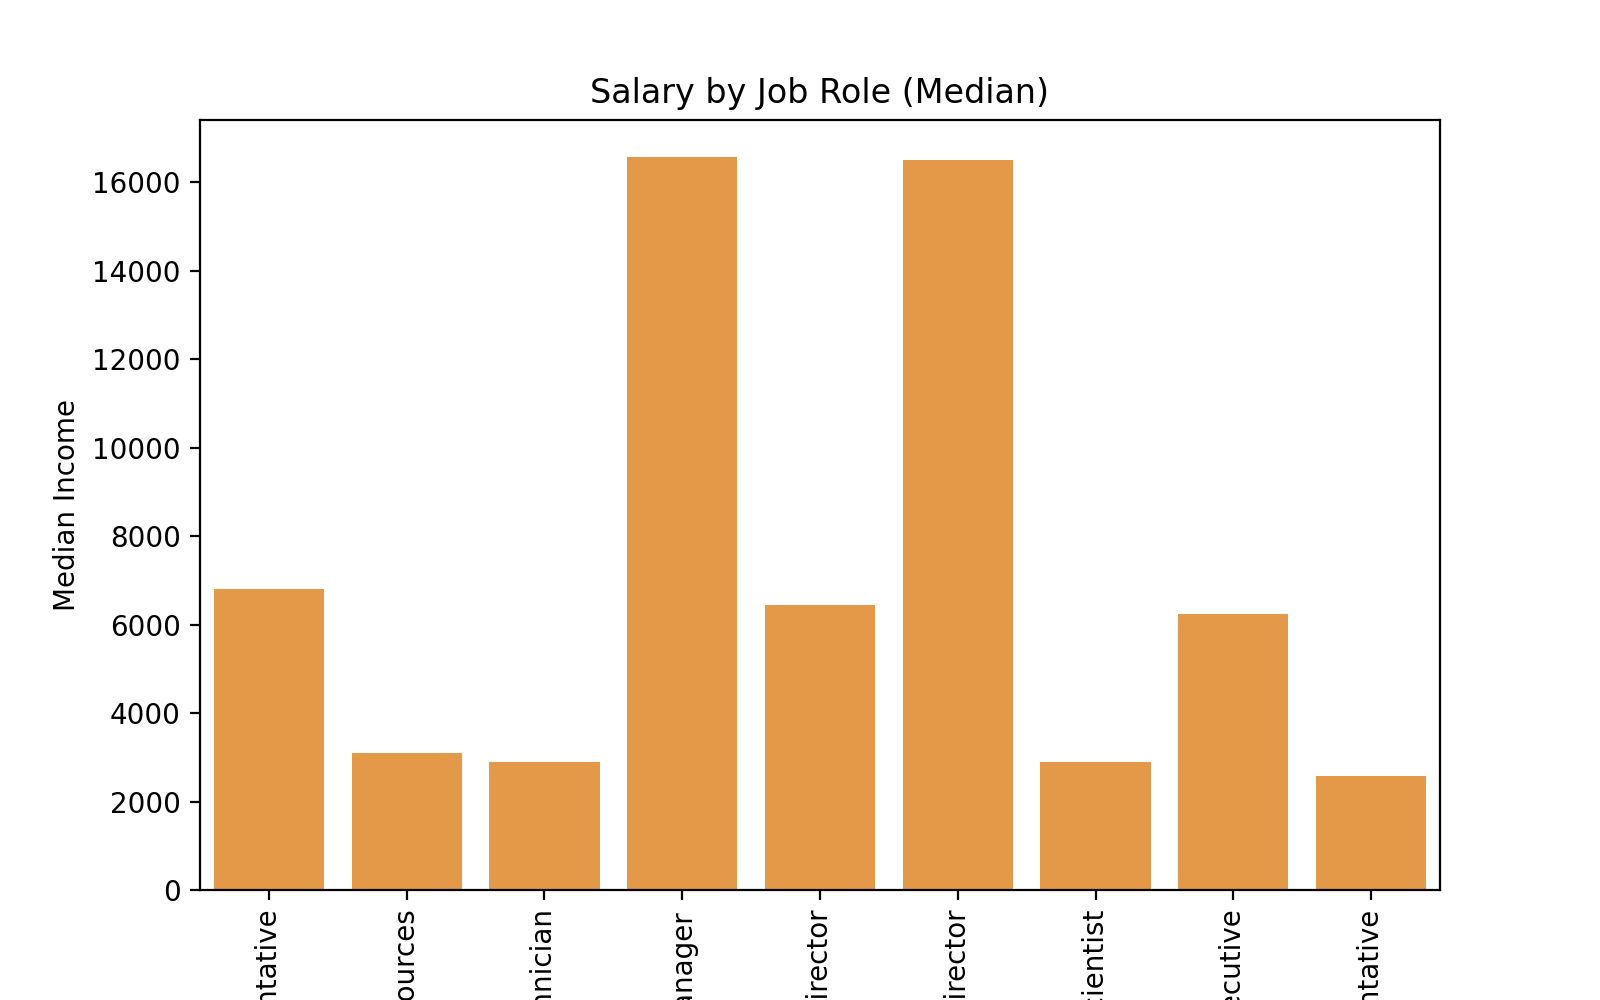

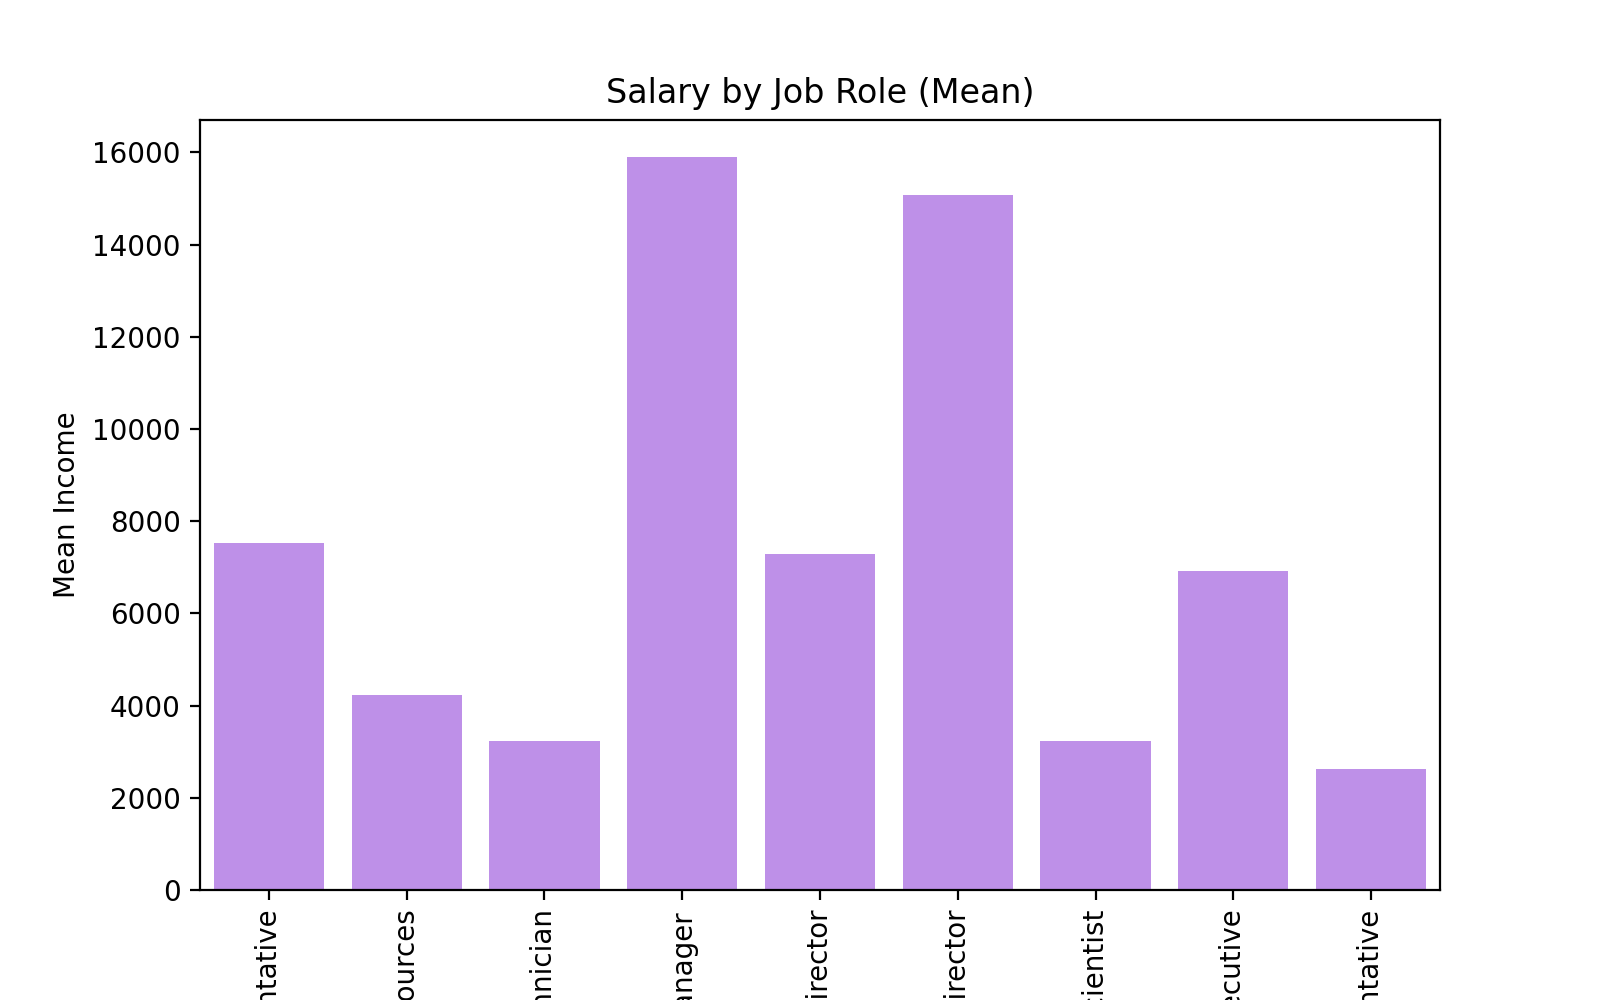

In [ ]:
#Salary by Job Role

# Calculate median and mean income by job role
job_sal = data1.groupby('JobRole')['MonthlyIncome'].agg(['median', 'mean']).reset_index()

# Set plot size
plt.figure(figsize=(8, 5))

# Median Salary Plot
sns.barplot(x='JobRole', y='median', data=job_sal, color="#FE9A2E")
plt.title("Salary by Job Role (Median)")
plt.xlabel("Job Role")
plt.ylabel("Median Income")
plt.xticks(rotation=90)

# Mean Salary Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='JobRole', y='mean', data=job_sal, color="#BE81F7")
plt.title("Salary by Job Role (Mean)")
plt.xlabel("Job Role")
plt.ylabel("Mean Income")
plt.xticks(rotation=90)

The above bar chart is for Salary by Job Role and from that we depicted that Managers and Research Directors have the highest salary on average.

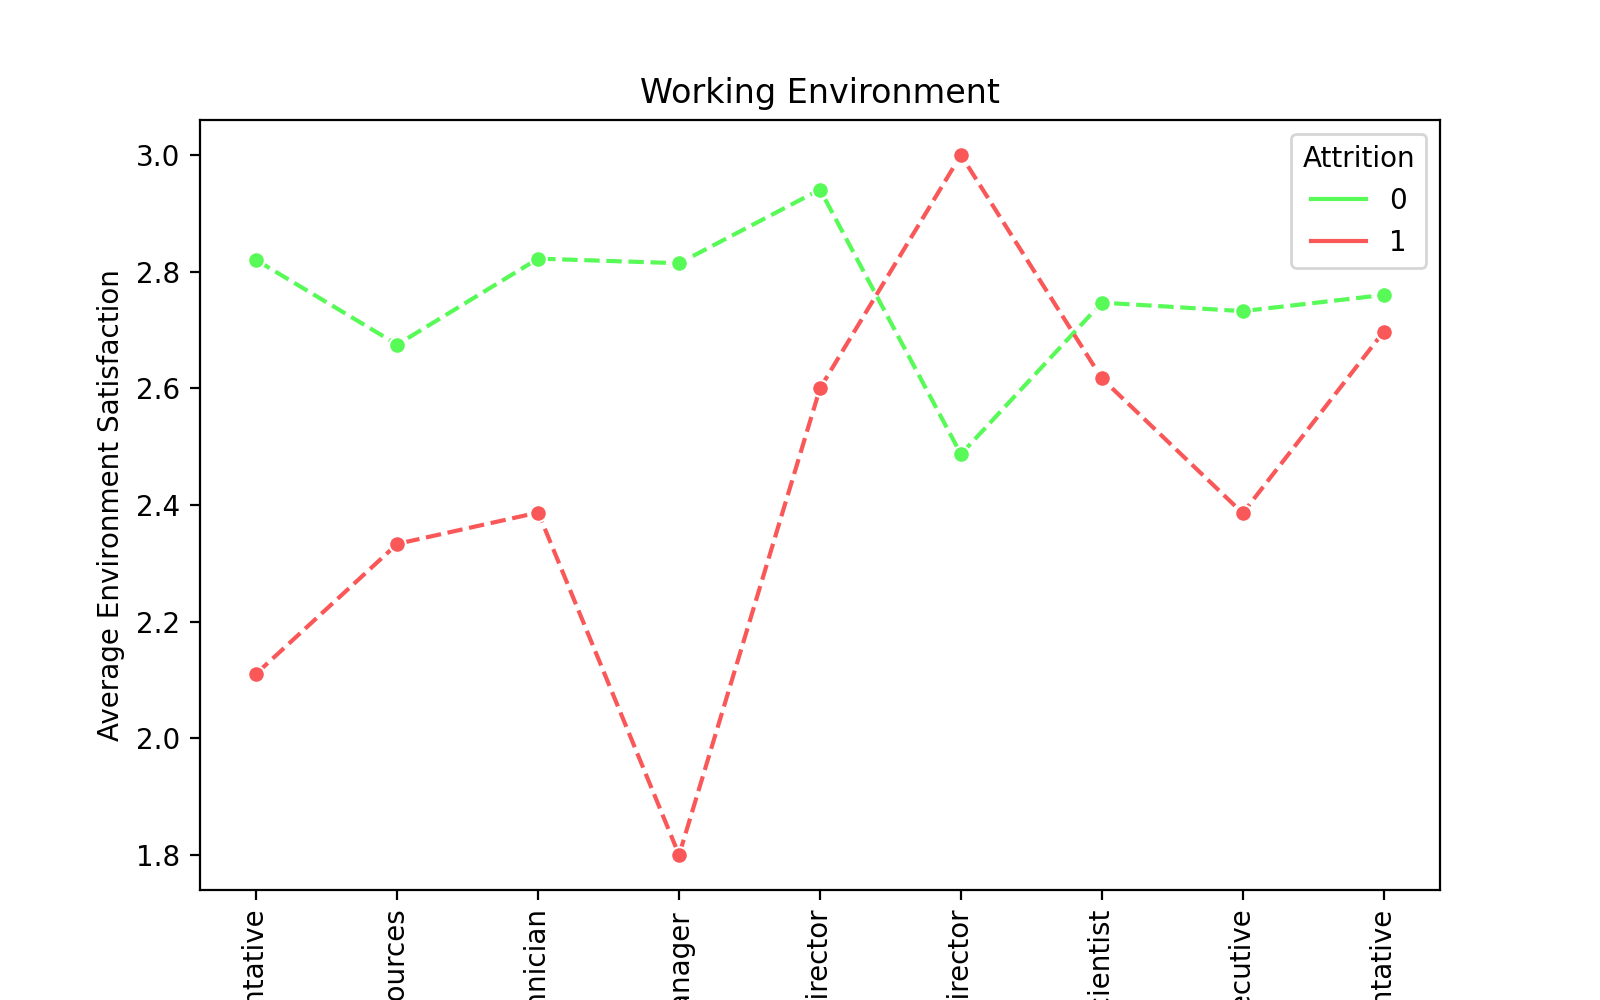

In [ ]:
# Calculate average environment satisfaction by job role and attrition status
env_attr = data1.groupby(['JobRole', 'Attrition'])['EnvironmentSatisfaction'].mean().reset_index()

# Set plot size
plt.figure(figsize=(8, 5))

# Plot environment satisfaction changes by job role
sns.lineplot(x='JobRole', y='EnvironmentSatisfaction', hue='Attrition', data=env_attr, linestyle='dashed', marker='o', palette=["#58FA58", "#FA5858"])

# Customize the plot
plt.title("Working Environment")
plt.xlabel("Job Position")
plt.ylabel("Average Environment Satisfaction")
plt.xticks(rotation=90)
plt.legend(title="Attrition")

# Display the plot
plt.show()


From the line plot above, it's evident that managers and healthcare representatives experience a comparatively lower working environment satisfaction. However, the situation differs for sales representatives, possibly because a significant number of them operate outside the organization.

<ipython-input-38-3a51693db960>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

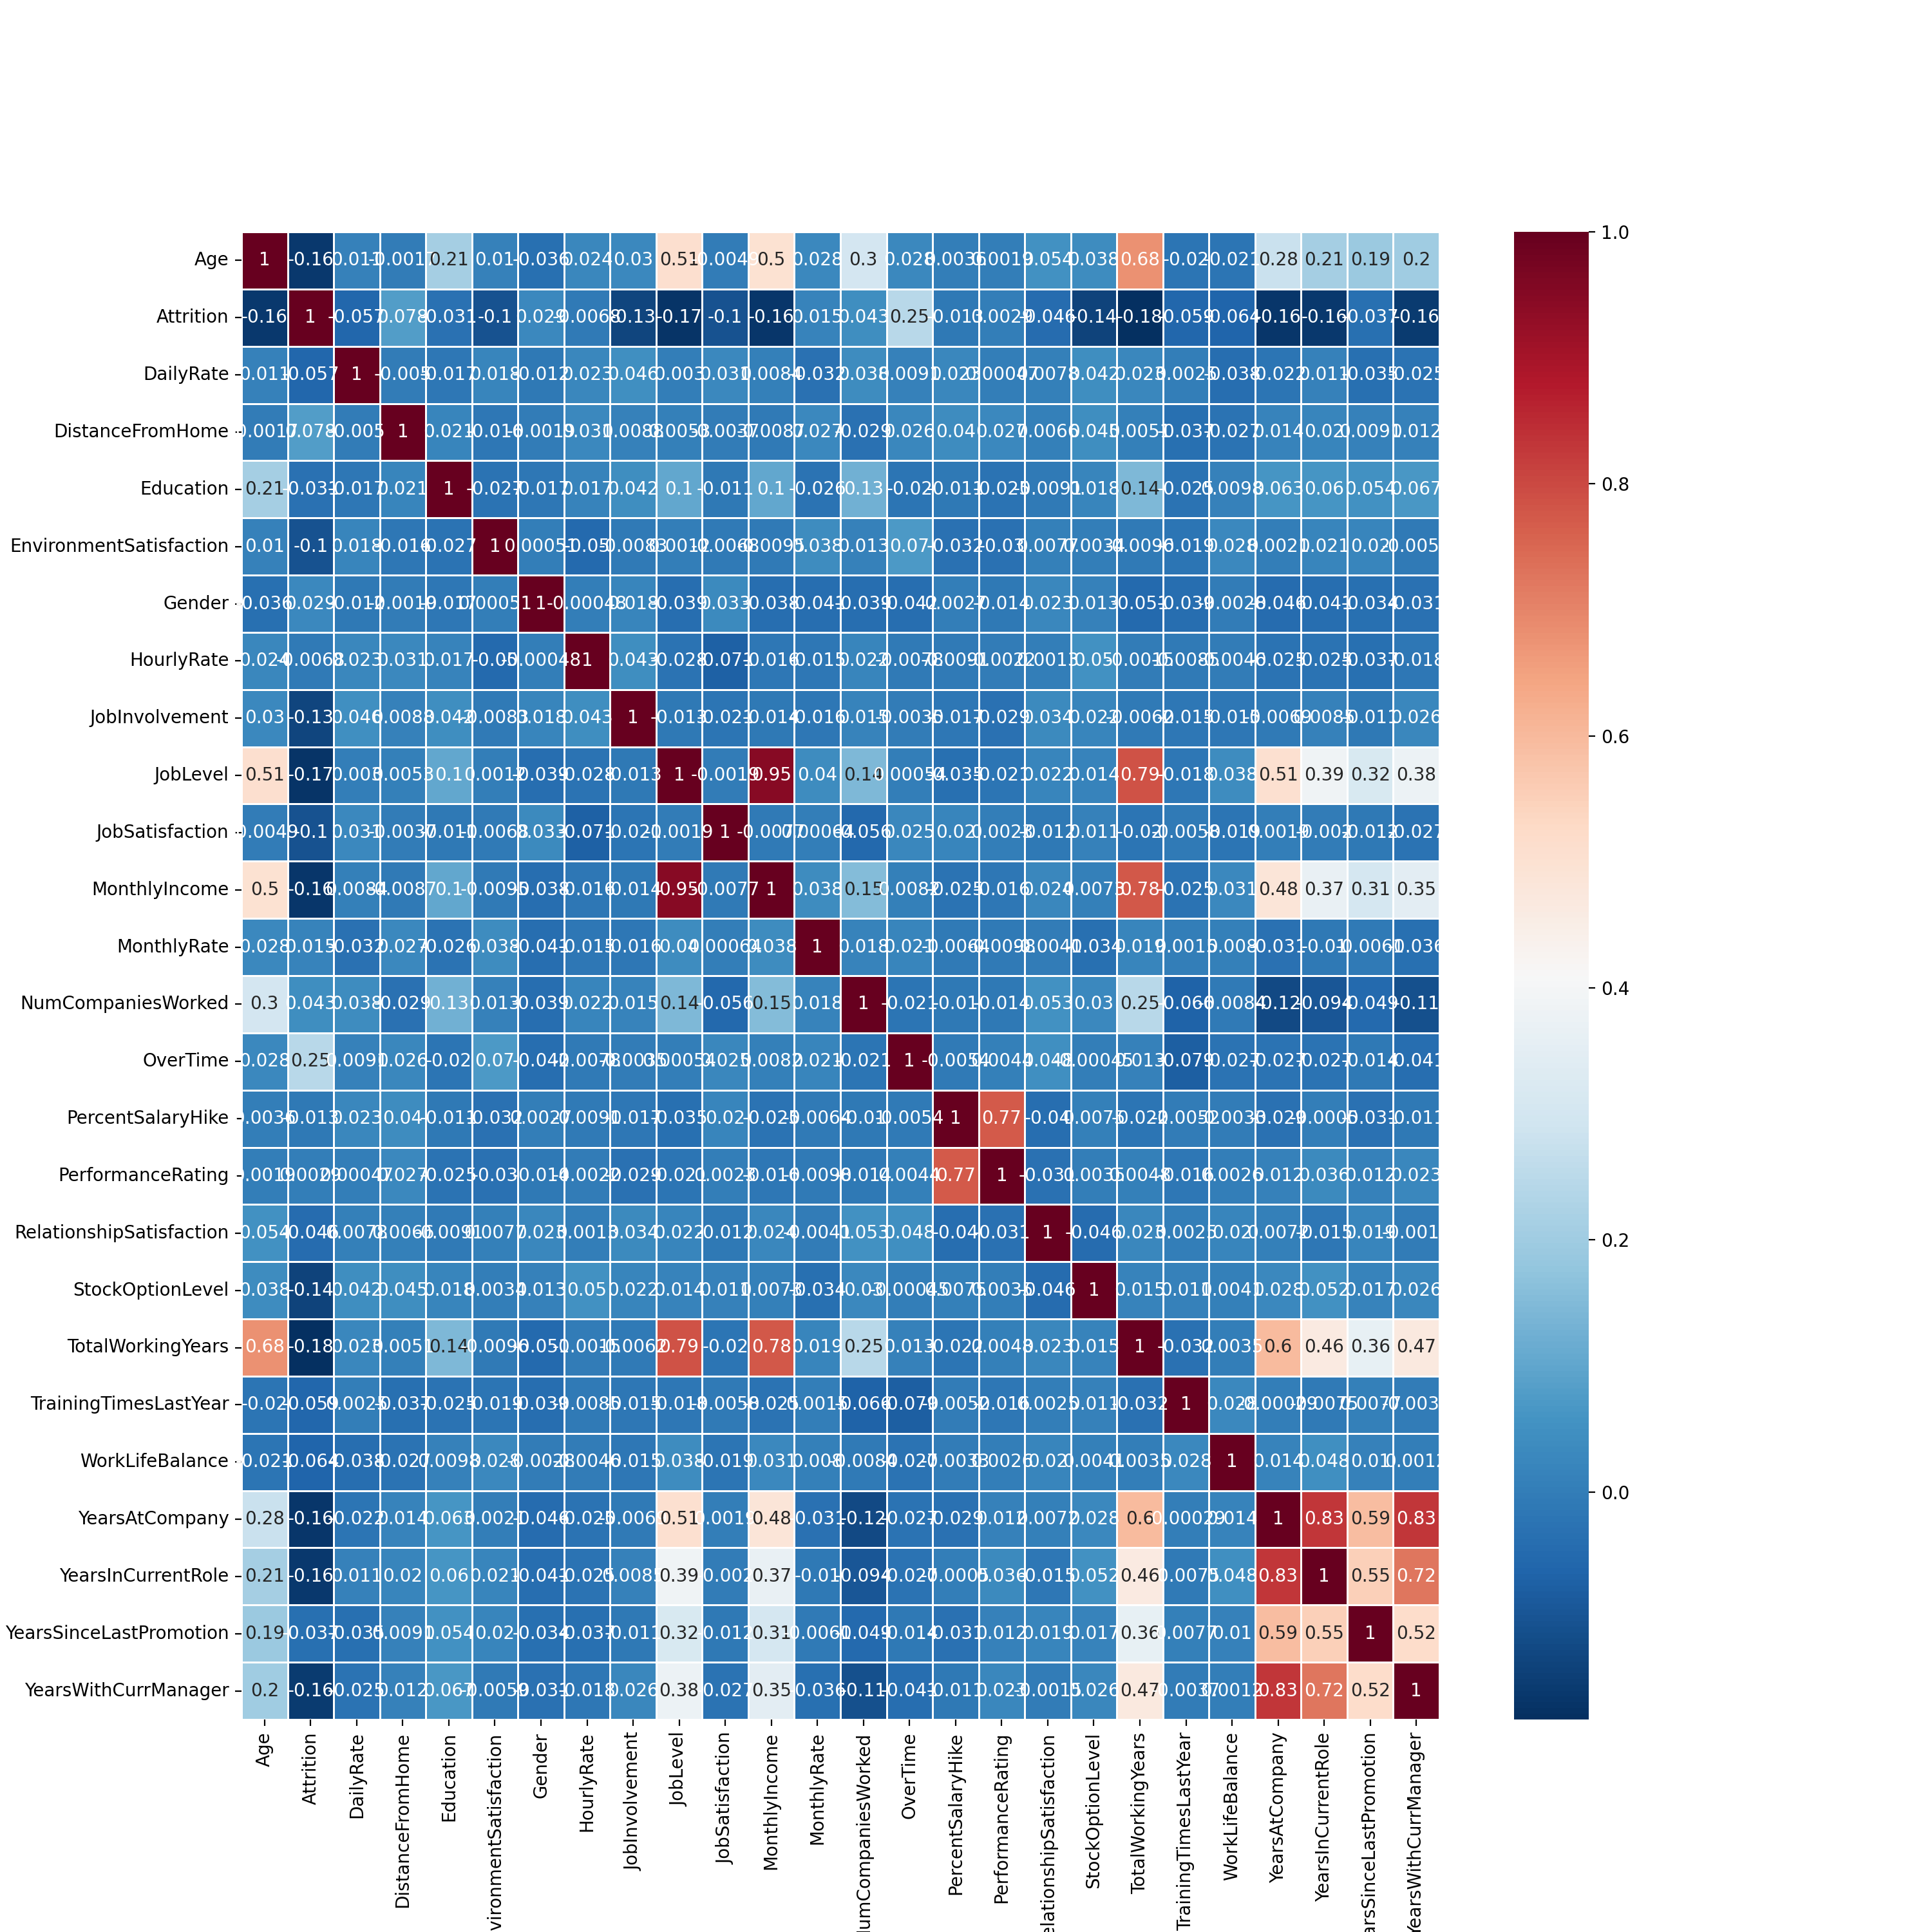

In [ ]:
# From the below heatmap we can see the correlation between all the variables
pearson = data1.corr(method='pearson')
pearson
plt.figure(figsize=(15, 15))
sns.heatmap(pearson,
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

The heatmap above displays the correlation among all variables. It indicates that the transformed categorical variables exhibit a connection with the target variable, with notable relations seen in variables like OverTime and JobRole.

**Downloading the Cleaned the dataset after Preprocessing and Visualization**

In [ ]:
# Assuming df is your cleaned DataFrame
# Save the DataFrame to a CSV file
df.to_csv('/content/cleaned_data.csv', index=False)

**Splitting the dataset into train and testing dataset**

Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [ ]:
# Train/Test split
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# LOGISTIC REGRESSION

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred = logistic_model.predict(X_test_scaled)

<Axes: >

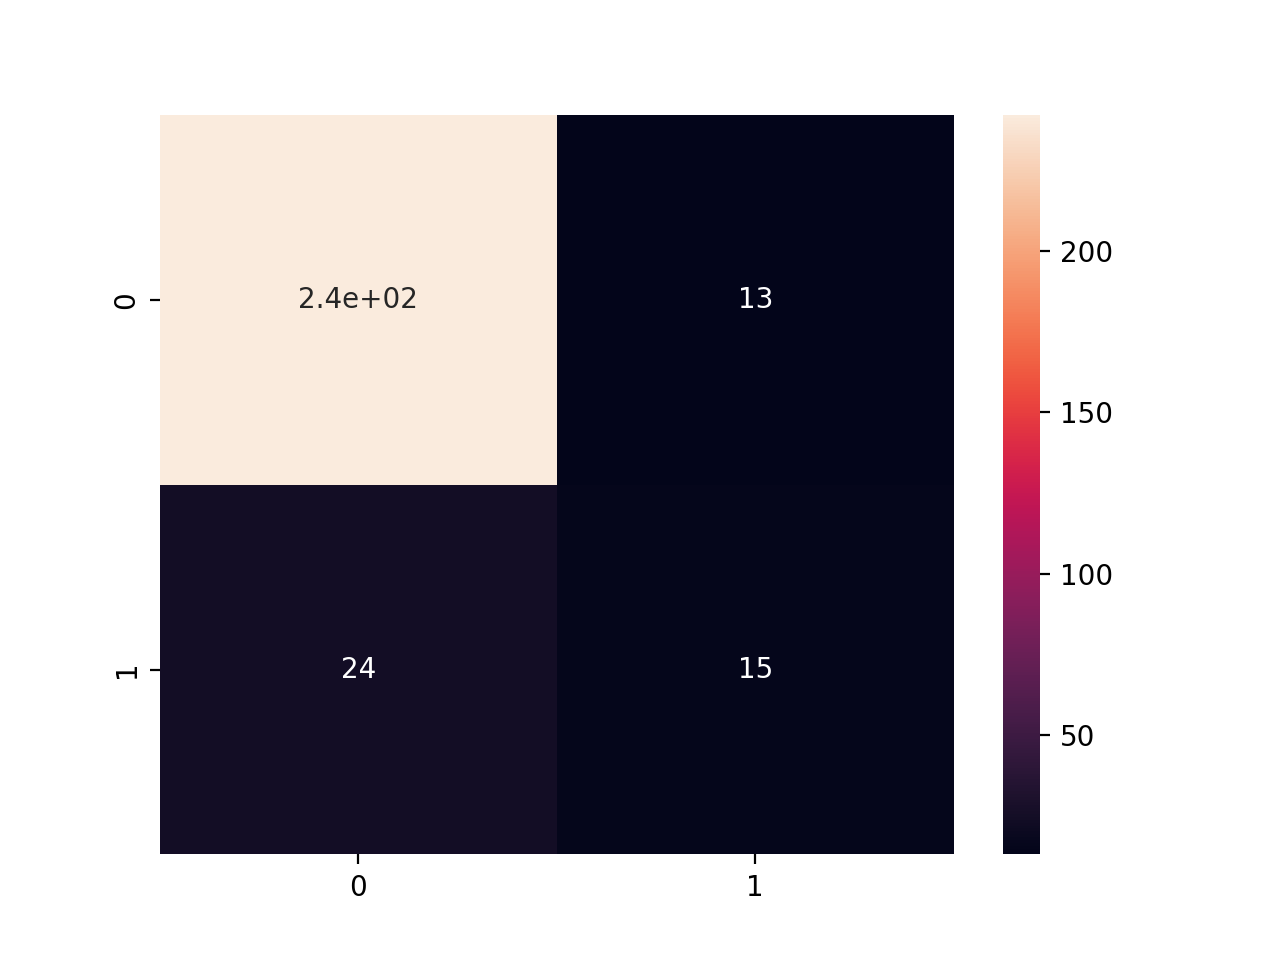

In [ ]:
#Confusion Matrix
import sklearn.metrics as metrics
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
#Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel: Logistic Regression')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.87
Confusion Matrix:
[[242  13]
 [ 24  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.54      0.38      0.45        39

    accuracy                           0.87       294
   macro avg       0.72      0.67      0.69       294
weighted avg       0.86      0.87      0.87       294



Area under ROC curve: 0.79


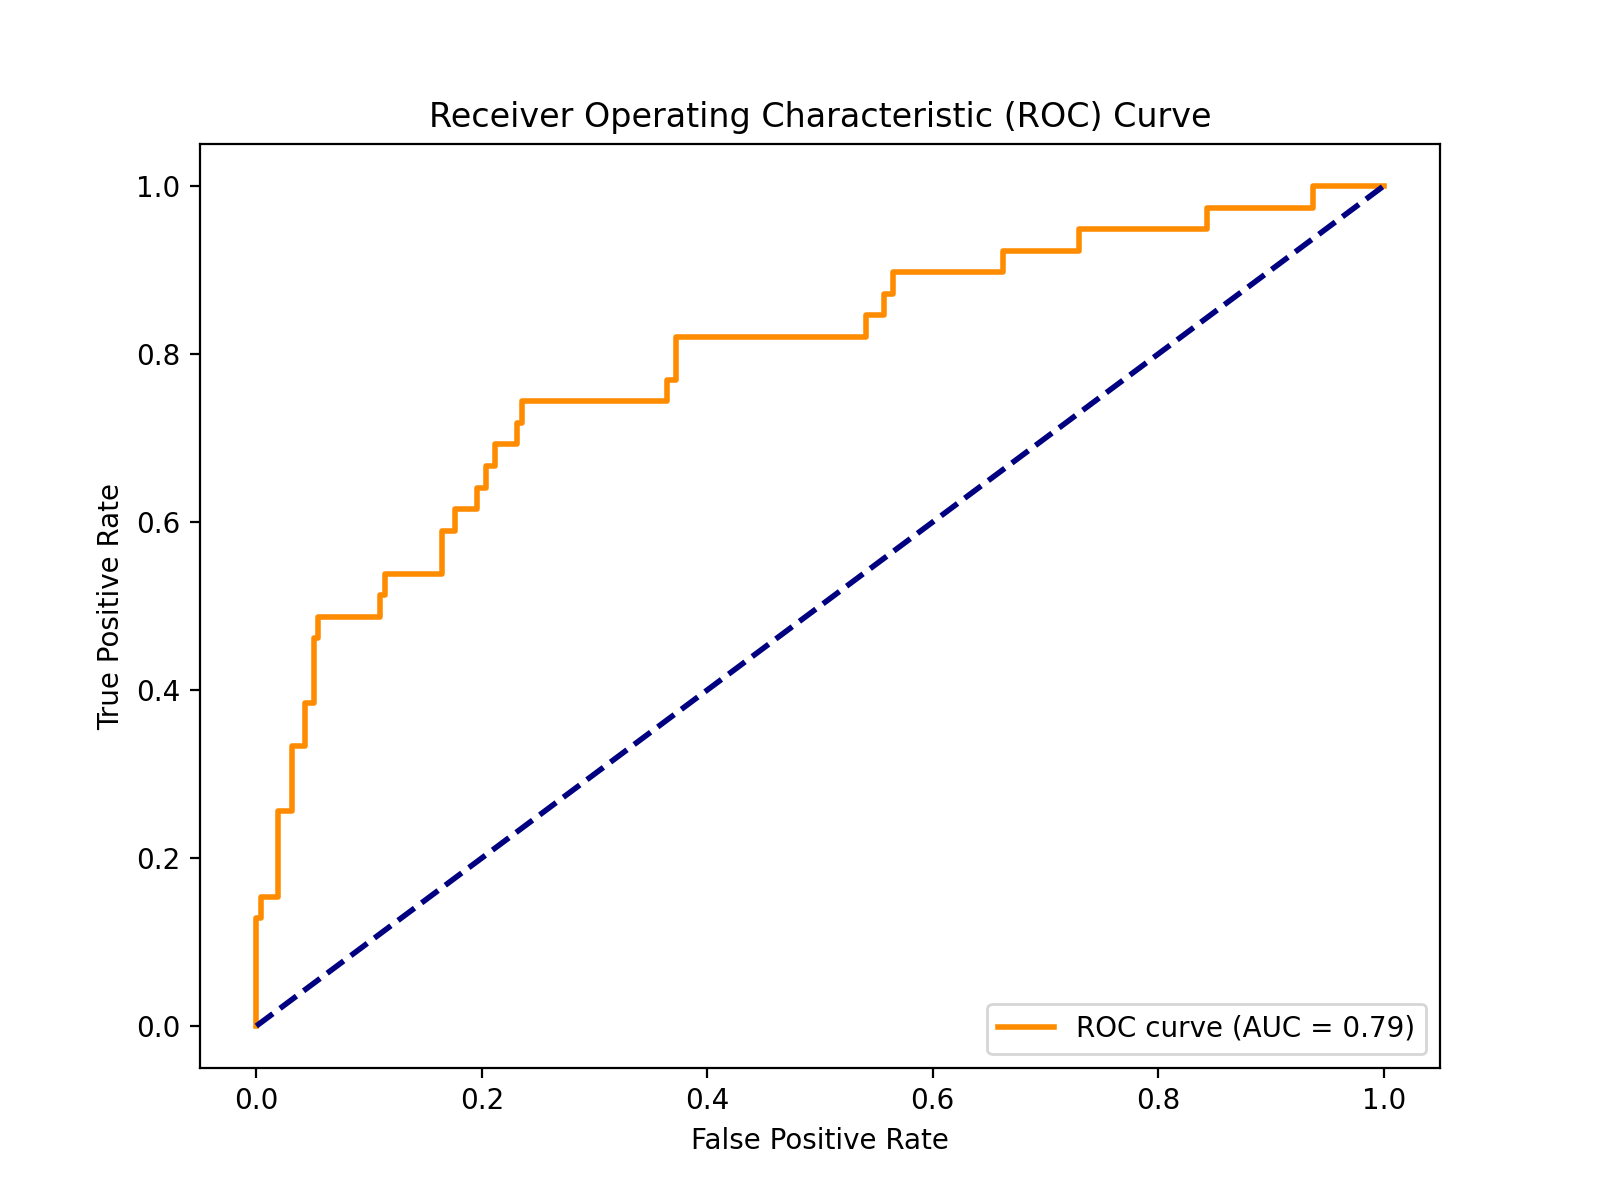

In [ ]:
#ROC CURVE FOR LOGISTIC REGRESSION
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_prob)

# Print the results
print(f'Area under ROC curve: {roc_auc:.2f}')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The Accuracy of Logistic Regression Model before Tuning is 87%

To increase the performance of the model we performed Hyperparameter tuning and Feature Selection

Hyperparameter Tuning for Logistic Regression

In [ ]:
# Hyperparameter tuning
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_logistic_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_logistic_model.predict(X_test_scaled)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'\nModel: Logistic Regression (Tuned)')
print(f'Accuracy: {accuracy_tuned:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_tuned))
print('Classification Report:')
print(classification_report(y_test, y_pred_tuned))

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}

Model: Logistic Regression (Tuned)
Accuracy: 0.88
Confusion Matrix:
[[246   9]
 [ 25  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       255
           1       0.61      0.36      0.45        39

    accuracy                           0.88       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.87      0.88      0.87       294



<Axes: >

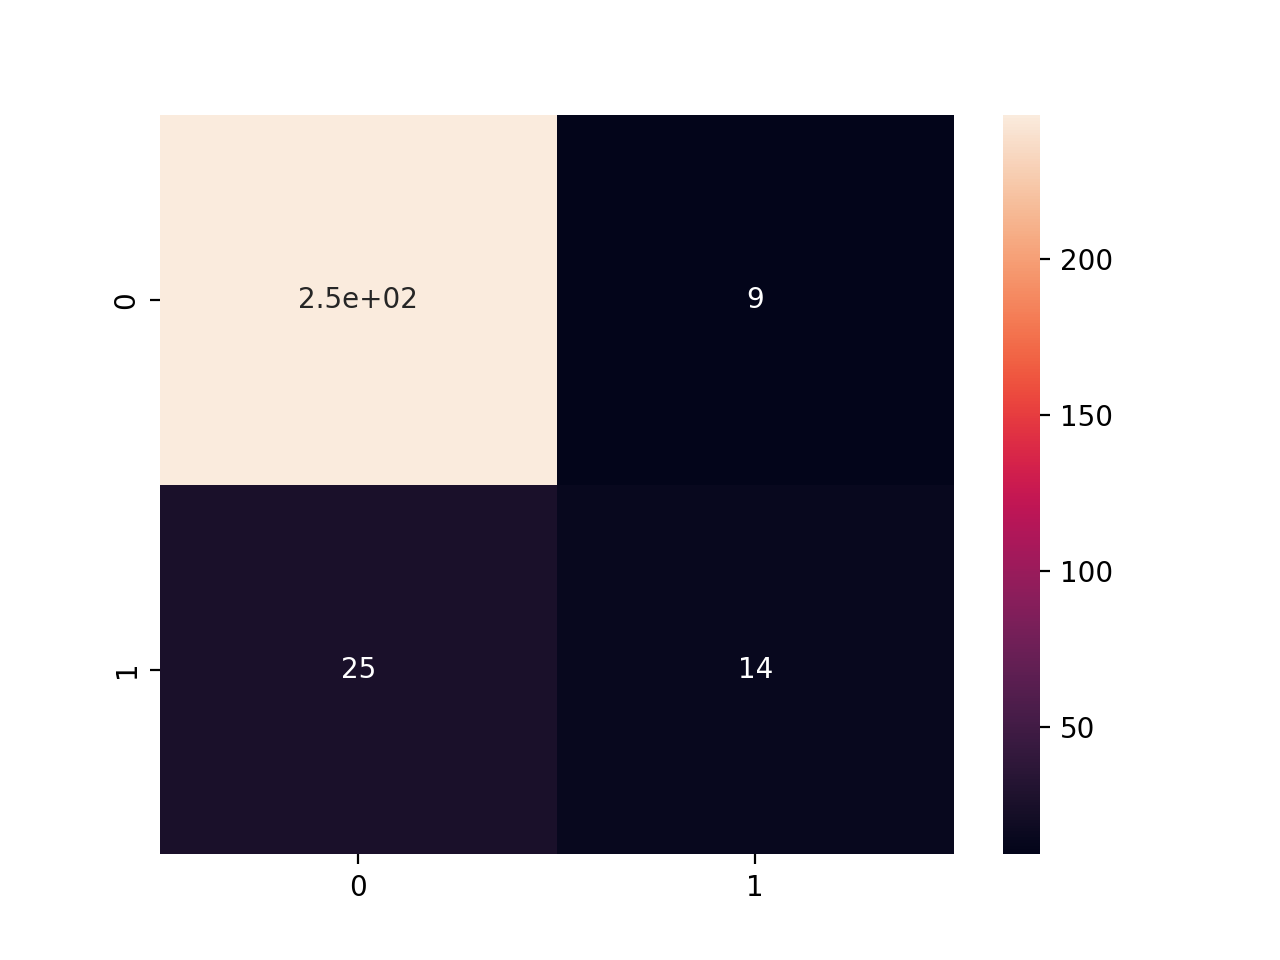

In [ ]:
#Confusion Matrix
import sklearn.metrics as metrics
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_tuned),annot=True)

The Accuracy of Logistic Regression Model after Tuning is 88%.After hyperprameter tuning we can see there is an Increase in Accuracy.

For the Better Feature Selection we are Performing RFE LOGISTIC REGRESSSION to train the model repeatedely and removing the least important features until the desired number of Features are achieved

**Feature Selection**

RFE LOGISTIC REGRESSION

In [ ]:
num_features_to_select = 30

rfe = RFE(estimator=best_logistic_model, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)
# Fit the logistic regression model on the selected features
logistic_model_rfe = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_rfe.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred_rfe = logistic_model_rfe.predict(X_test_rfe)

# Evaluate the model with RFE
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f'\nModel: Logistic Regression (RFE)')
print(f'Accuracy (RFE): {accuracy_rfe:.2f}')
print('Confusion Matrix (RFE):')
print(confusion_matrix(y_test, y_pred_rfe))
print('Classification Report (RFE):')
print(classification_report(y_test, y_pred_rfe))


Model: Logistic Regression (RFE)
Accuracy (RFE): 0.89
Confusion Matrix (RFE):
[[244  11]
 [ 22  17]]
Classification Report (RFE):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.61      0.44      0.51        39

    accuracy                           0.89       294
   macro avg       0.76      0.70      0.72       294
weighted avg       0.88      0.89      0.88       294



By Performing RFE Logistic Regression we have achieved an accuracy of 89% which is higher than the above models.

<Axes: >

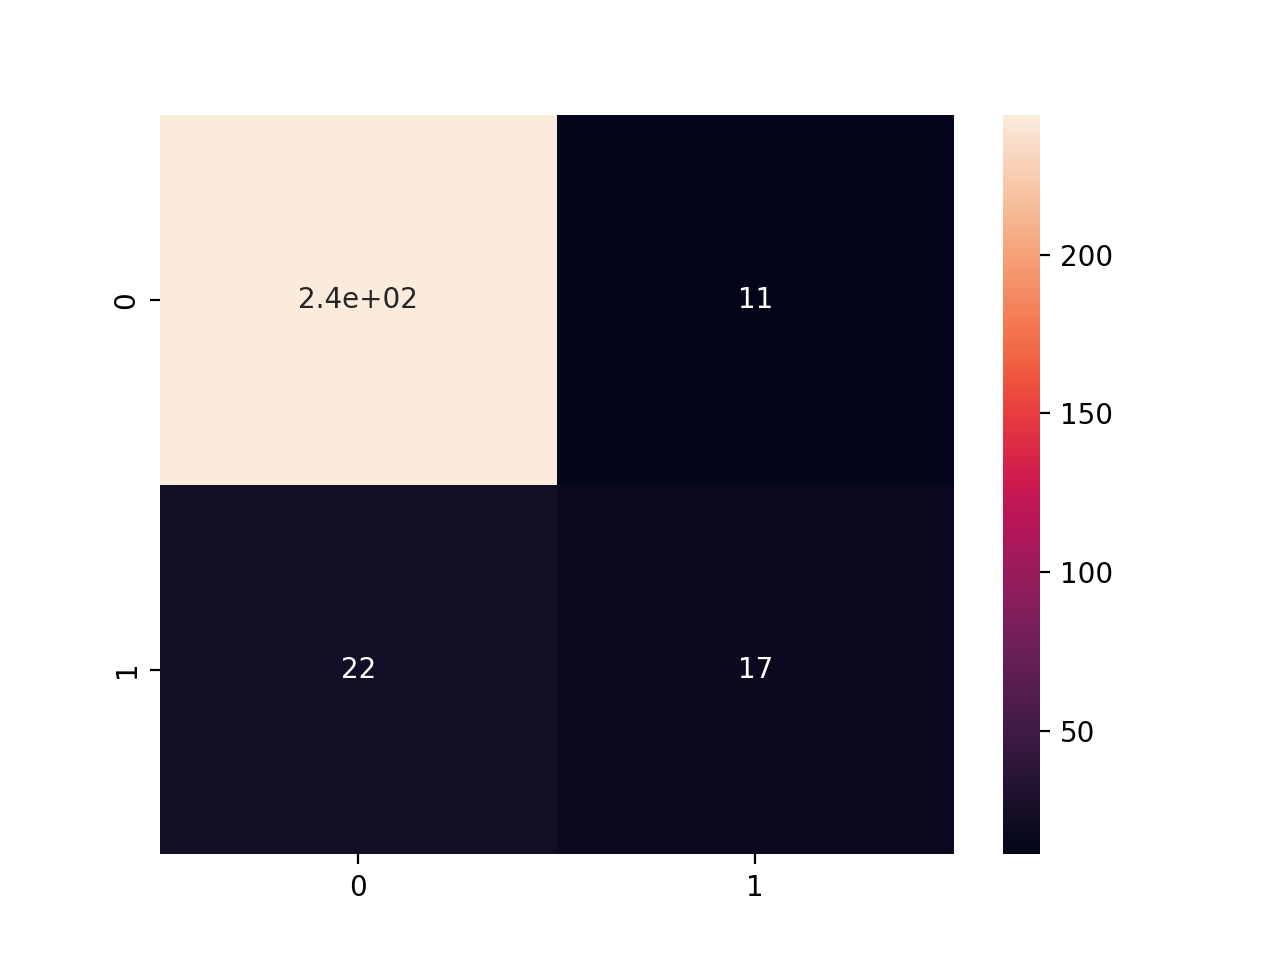

In [ ]:
#Confusion Matrix
import sklearn.metrics as metrics
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_rfe),annot=True)

Area under ROC curve (RFE): 0.79


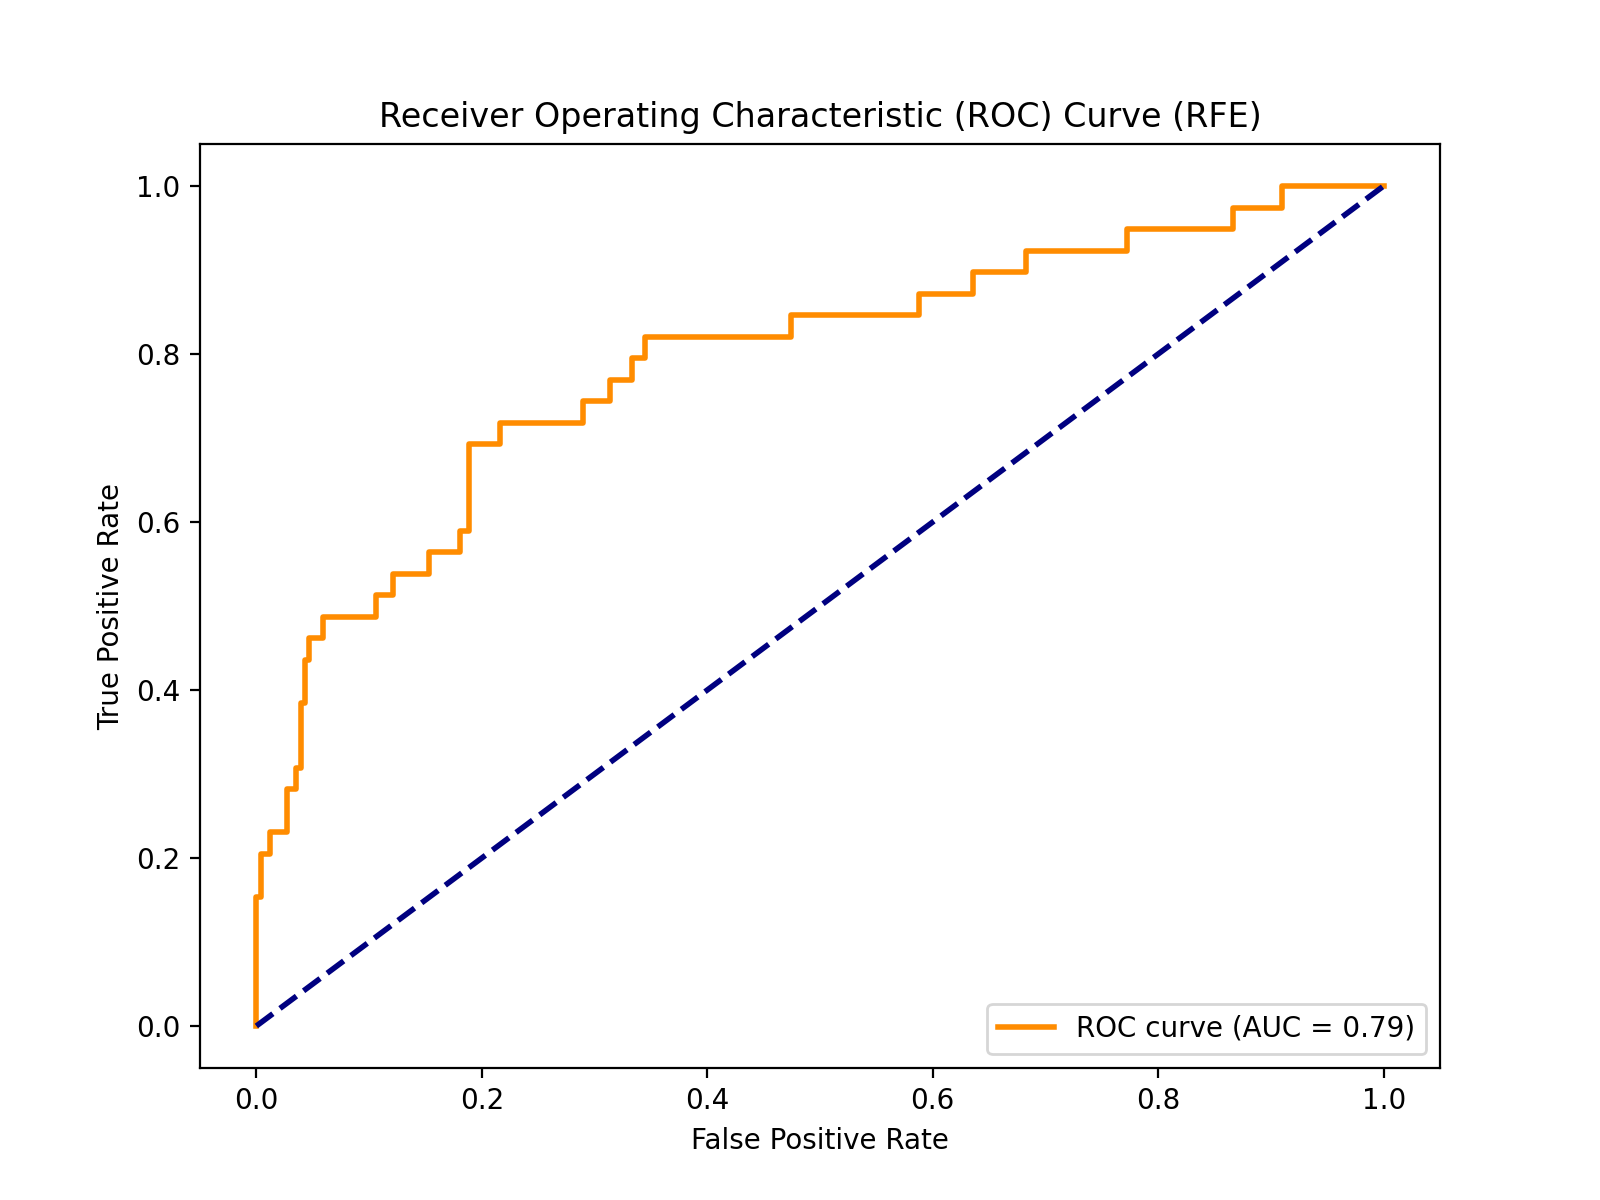

In [ ]:
# Get predicted probabilities for the positive class (class 1)
y_prob_rfe = logistic_model_rfe.predict_proba(X_test_rfe)[:, 1]

# Calculate the ROC curve
fpr_rfe, tpr_rfe, thresholds_rfe = roc_curve(y_test, y_prob_rfe)

# Calculate the area under the ROC curve
roc_auc_rfe = roc_auc_score(y_test, y_prob_rfe)

# Print the results
print(f'Area under ROC curve (RFE): {roc_auc_rfe:.2f}')

# Plot the ROC curve for RFE
plt.figure(figsize=(8, 6))
plt.plot(fpr_rfe, tpr_rfe, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rfe:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (RFE)')
plt.legend(loc='lower right')
plt.show()

# RANDOM FOREST

In [ ]:
# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred = random_forest_model.predict(X_test_scaled)

<Axes: >

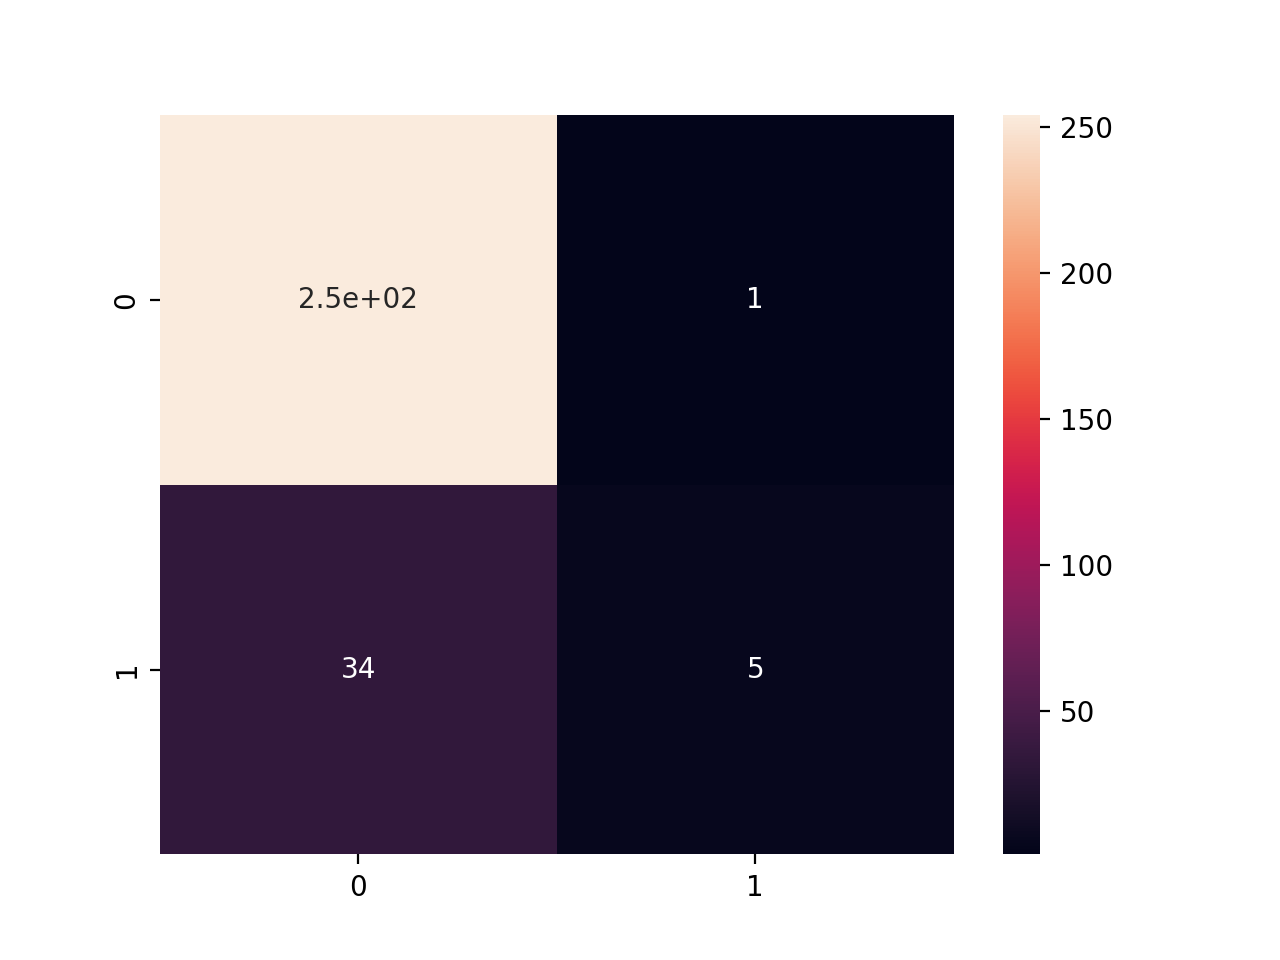

In [ ]:
#Confusion Matrix
import sklearn.metrics as metrics
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel: Random Forest')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Model: Random Forest
Accuracy: 0.88
Confusion Matrix:
[[254   1]
 [ 34   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



By Implementing the Random Forest Algorithm we have achieved 88% Accuracy, which is similar to the hyper tuned logistic Regression.

Area under ROC curve: 0.72


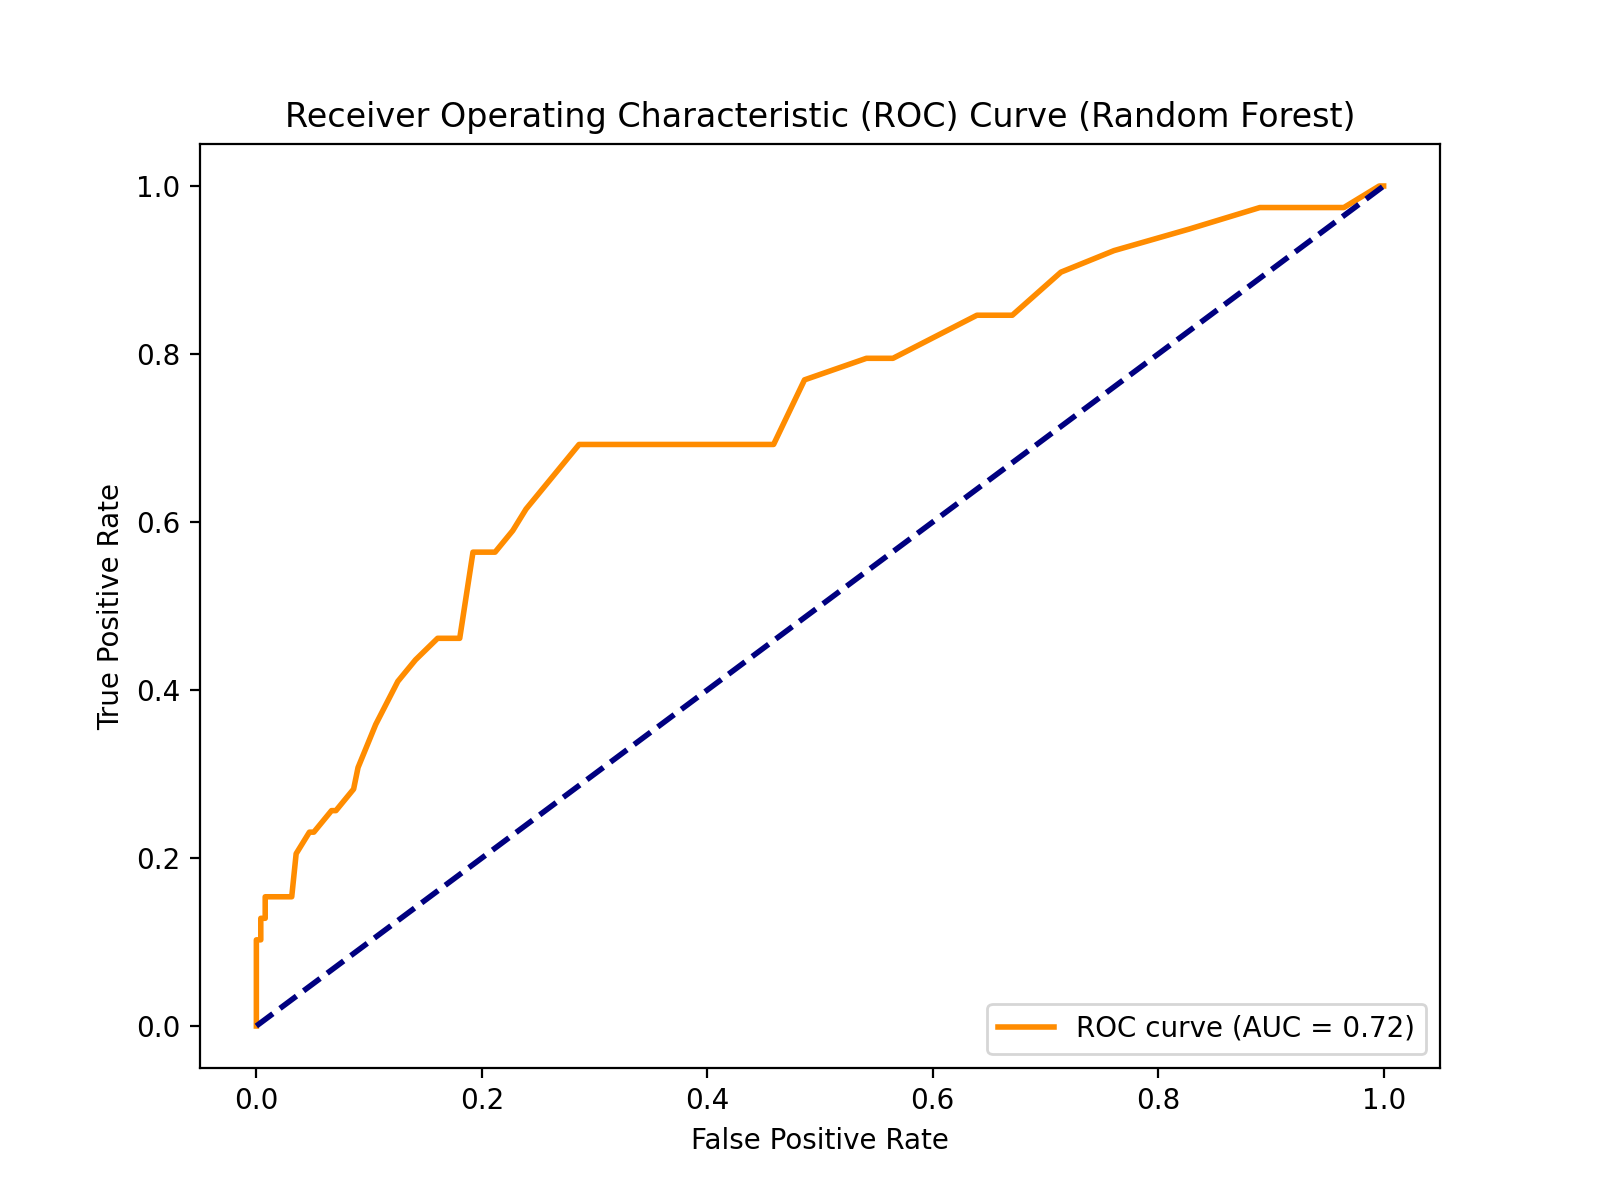

In [ ]:
#ROC CURVE
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Get predicted probabilities for the positive class (class 1)
y_prob_rf = random_forest_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Calculate the area under the ROC curve
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print the results
print(f'Area under ROC curve: {roc_auc_rf:.2f}')

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()


Random Forest with Hyperparameter Tuning and Feature Selection

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Print best hyperparameters
print(f"Best Hyperparameters: {best_params}")



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
# Feature selection using RFE
best_model = grid_search.best_estimator_
rfe = RFE(best_model, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

# Transform the features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Fit the model on the selected features
best_model.fit(X_train_selected, y_train)

# Predictions
y_pred = best_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel: Random Forest')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Model: Random Forest
Accuracy: 0.87
Confusion Matrix:
[[252   3]
 [ 34   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.62      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.75      0.56      0.57       294
weighted avg       0.85      0.87      0.84       294



<Axes: >

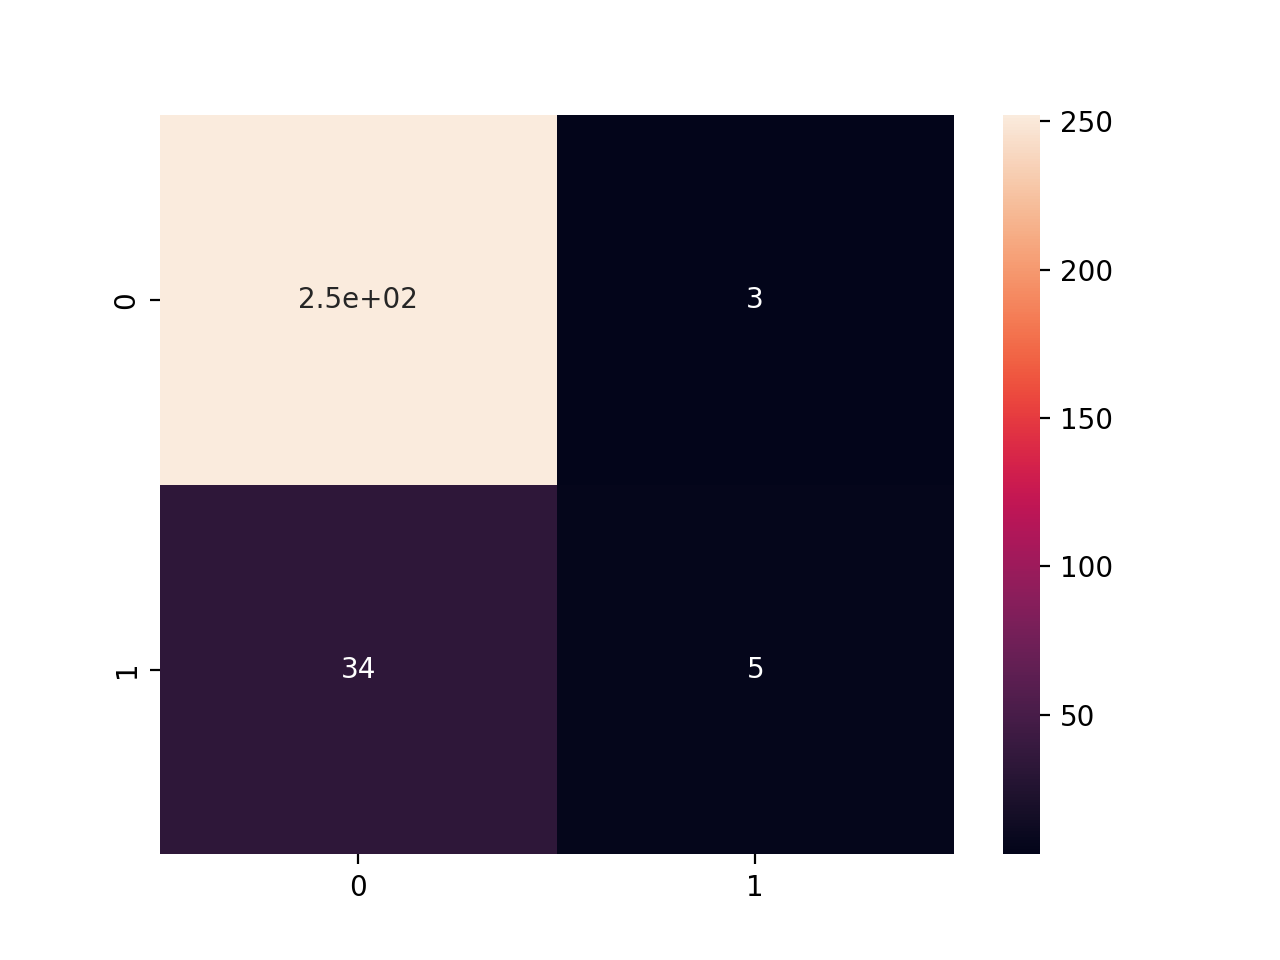

In [ ]:
#Confusion Matrix
import sklearn.metrics as metrics
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

After Hyperparameter Tuning and Feature Selection for Random Forest Algorithm we have seen that there is a Decrease in Accuracy.This might be because of Overfitting of the data

SUPPORT VECTOR MACHINE

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

<Axes: >

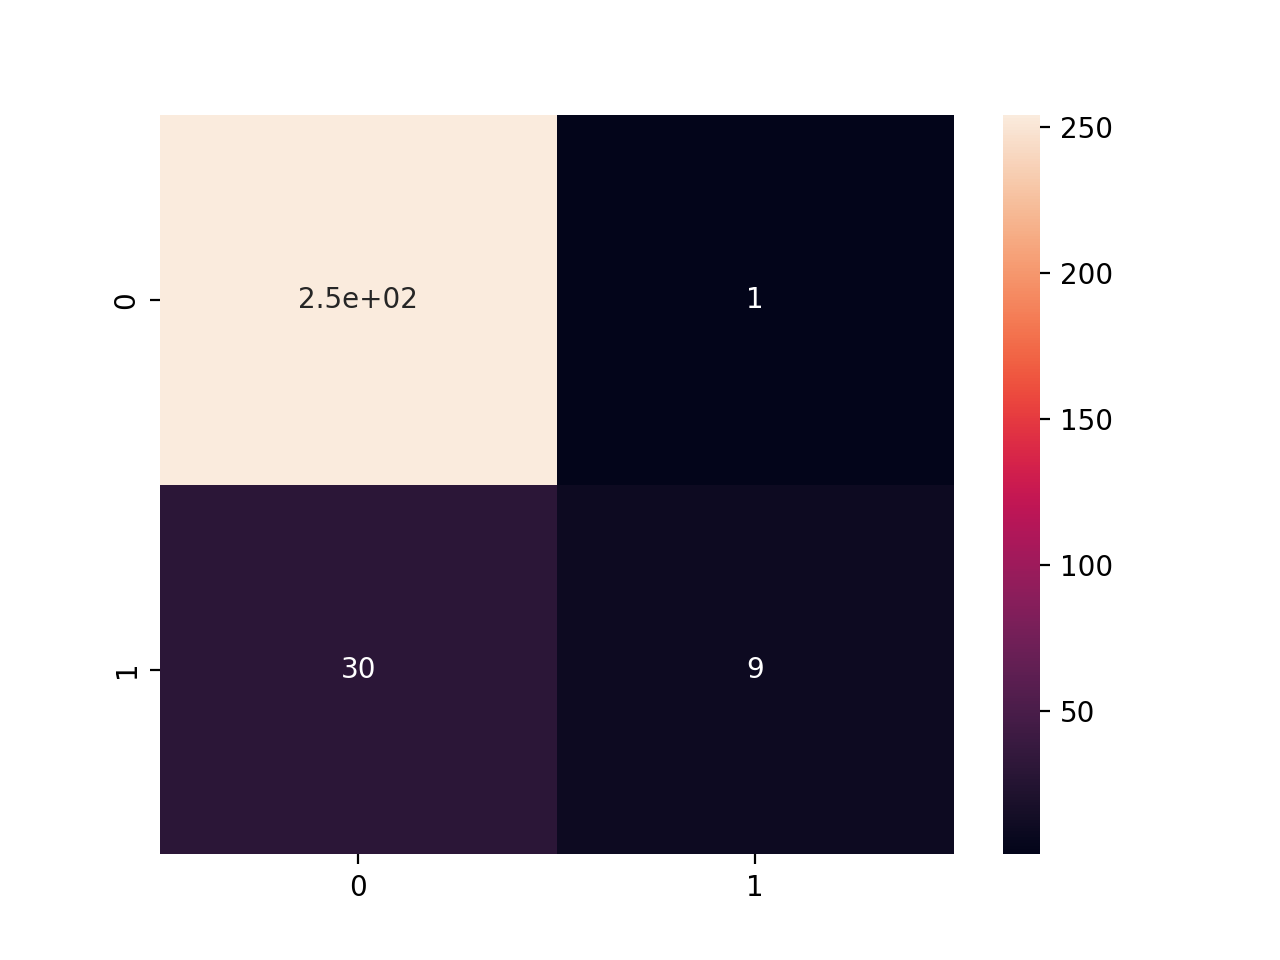

In [ ]:
#Confusion Matrix
import sklearn.metrics as metrics
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel: Support Vector Machine')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Model: Support Vector Machine
Accuracy: 0.89
Confusion Matrix:
[[254   1]
 [ 30   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       0.90      0.23      0.37        39

    accuracy                           0.89       294
   macro avg       0.90      0.61      0.65       294
weighted avg       0.90      0.89      0.87       294



The Accuracy of SVM model is 89%.

Area under ROC curve: 0.80


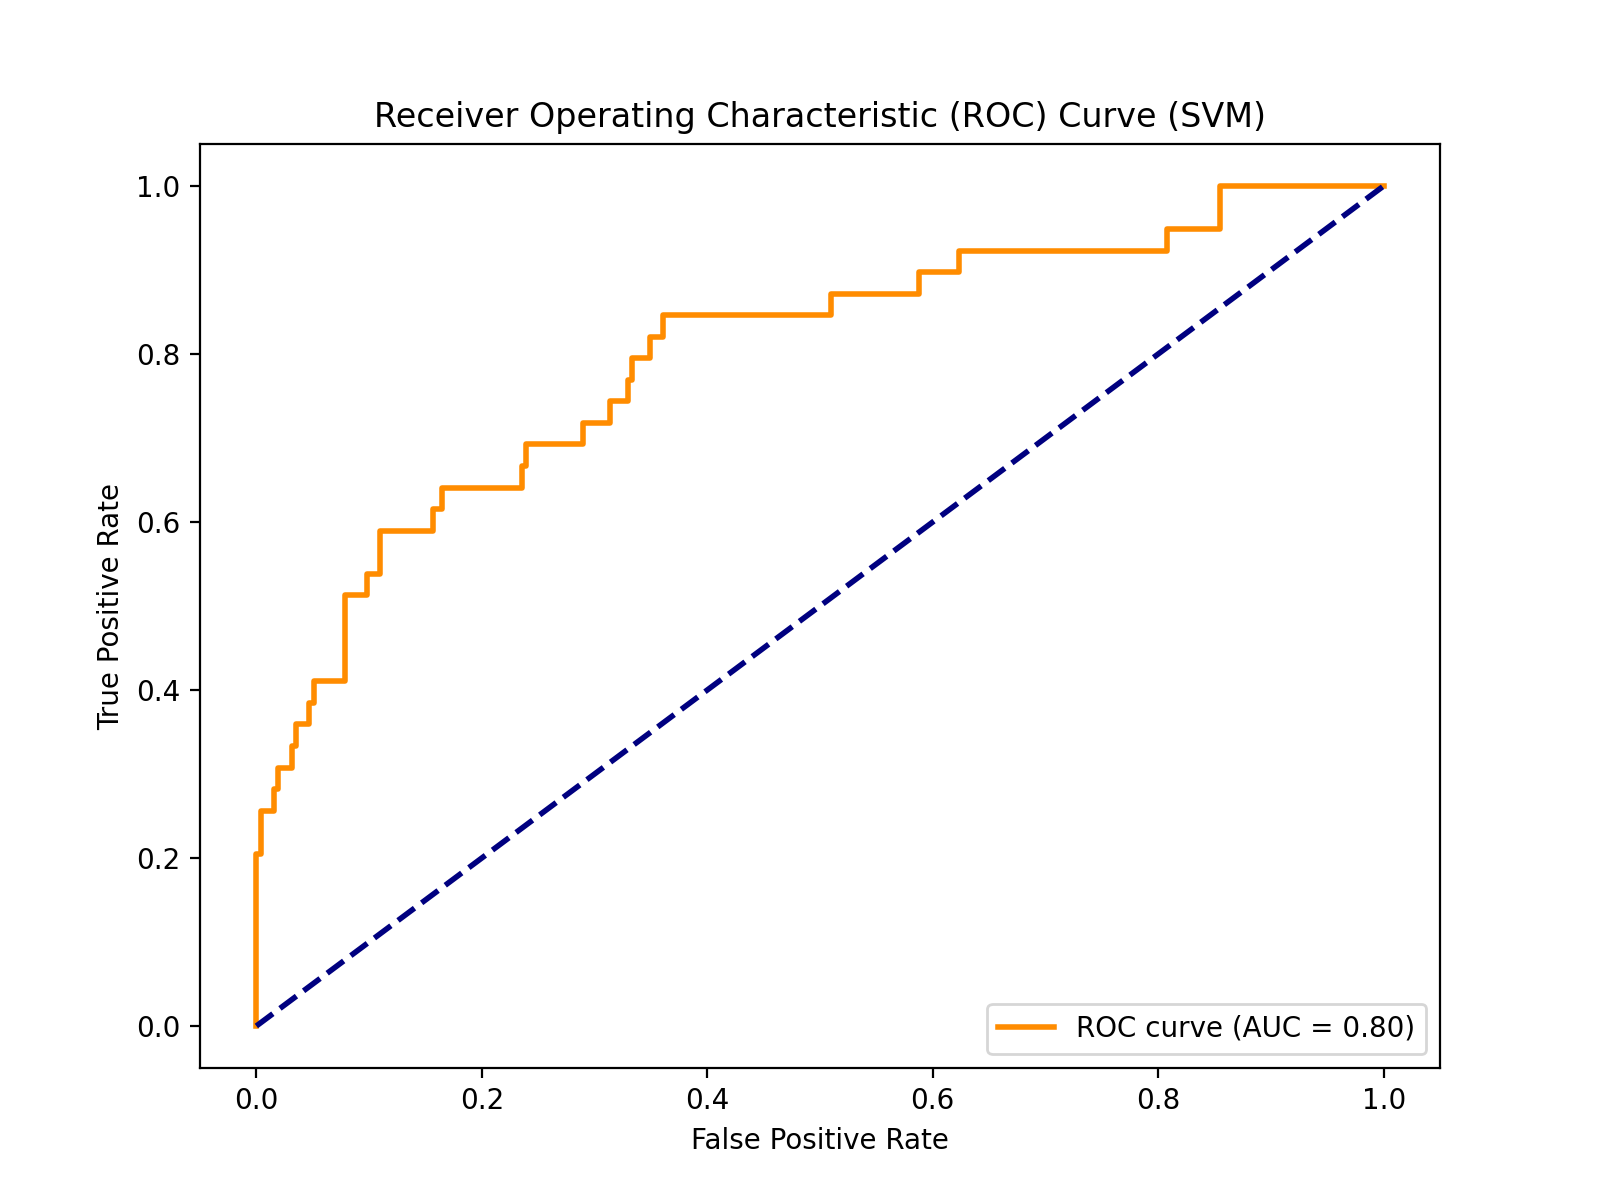

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Get predicted probabilities for the positive class (class 1)
y_prob_svm = svm_model.decision_function(X_test_scaled)

# Calculate the ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)

# Calculate the area under the ROC curve
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Print the results
print(f'Area under ROC curve: {roc_auc_svm:.2f}')

# Plot the ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc='lower right')
plt.show()


**Hyperparameter Tuning and Feature Selection**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Fit the model with the best hyperparameters
svm_model_tuned = SVC(random_state=42, **best_params)
svm_model_tuned.fit(X_train_scaled, y_train)




SVC(C=0.1, gamma=0.1, kernel='linear', random_state=42)

The above output are the best hyperparameters for SVM Model.

In [ ]:
# Feature selection using RFE
num_features_to_select = 30  # You can adjust this based on the number of features you want to keep
rfe = RFE(estimator=svm_model_tuned, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Train the model on the selected features
svm_model_tuned.fit(X_train_rfe, y_train)

# Make predictions
y_pred_tuned = svm_model_tuned.predict(X_test_rfe)

# Evaluate the model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print('\nModel: Support Vector Machine (Tuned)')
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy_tuned:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_tuned))
print('Classification Report:')
print(classification_report(y_test, y_pred_tuned))


Model: Support Vector Machine (Tuned)
Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.89
Confusion Matrix:
[[248   7]
 [ 26  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.65      0.33      0.44        39

    accuracy                           0.89       294
   macro avg       0.78      0.65      0.69       294
weighted avg       0.87      0.89      0.87       294



<Axes: >

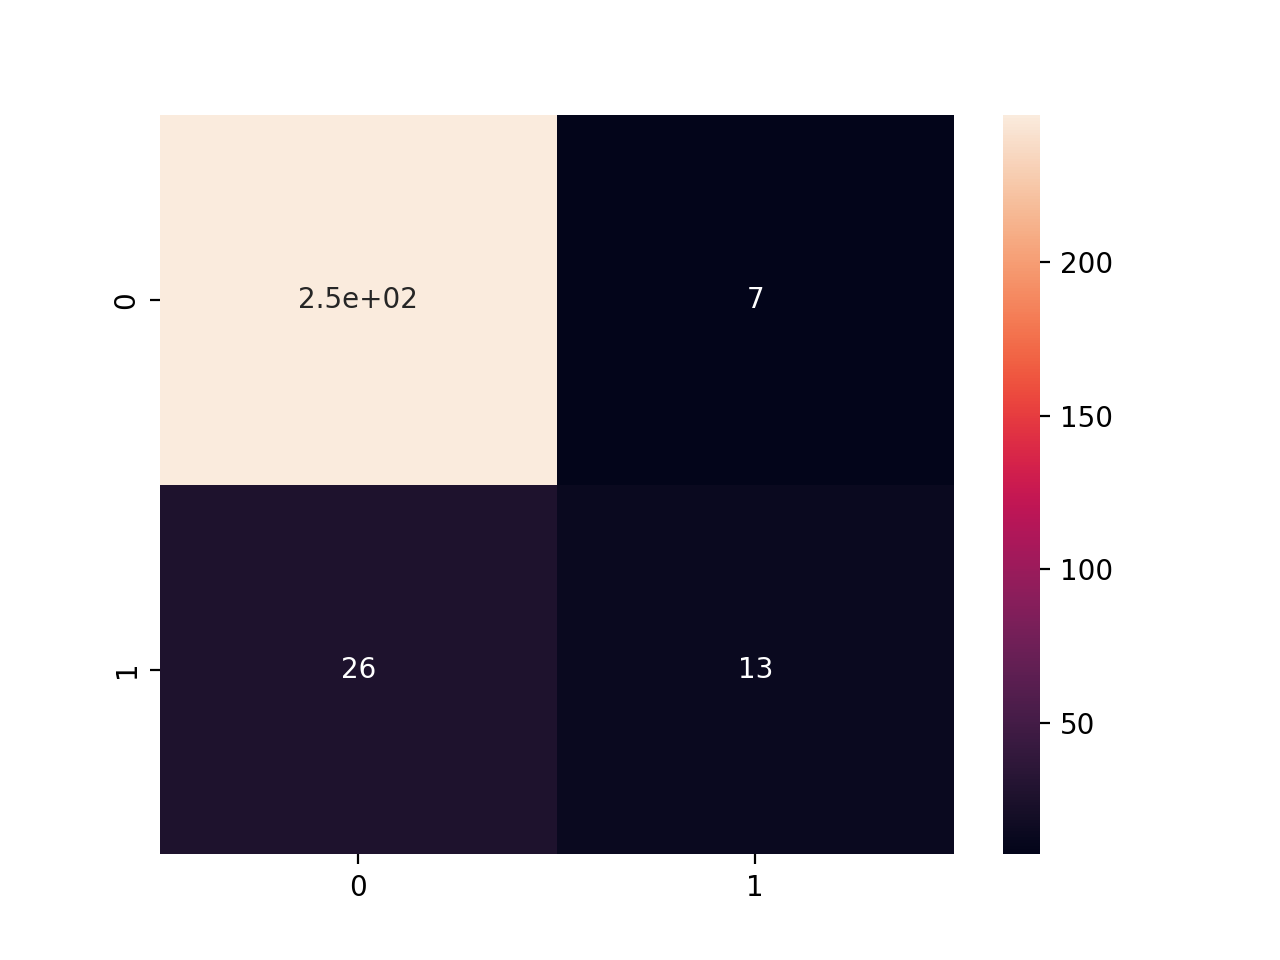

In [ ]:
#Confusion Matrix
import sklearn.metrics as metrics
sns.heatmap(metrics.confusion_matrix(y_test,y_pred_tuned),annot=True)

For SVM Model , The Acccuracy remained the same even after Hyparameter tuning and Feature Selection.This is because the model has already reached the maximum potential Accuracy.


We have built machine learning models.Now we gonna use Neural Networks on the dataset.

**ANN/SIMPLE NEURAL NETWORK**

In [ ]:
#. Simple neural network with one dense layer and one output layer

simple_nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1, activation='sigmoid')
])
simple_nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
y_pred = simple_nn_model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

10/10 [==============================] - 0s 2ms/step


<Axes: >

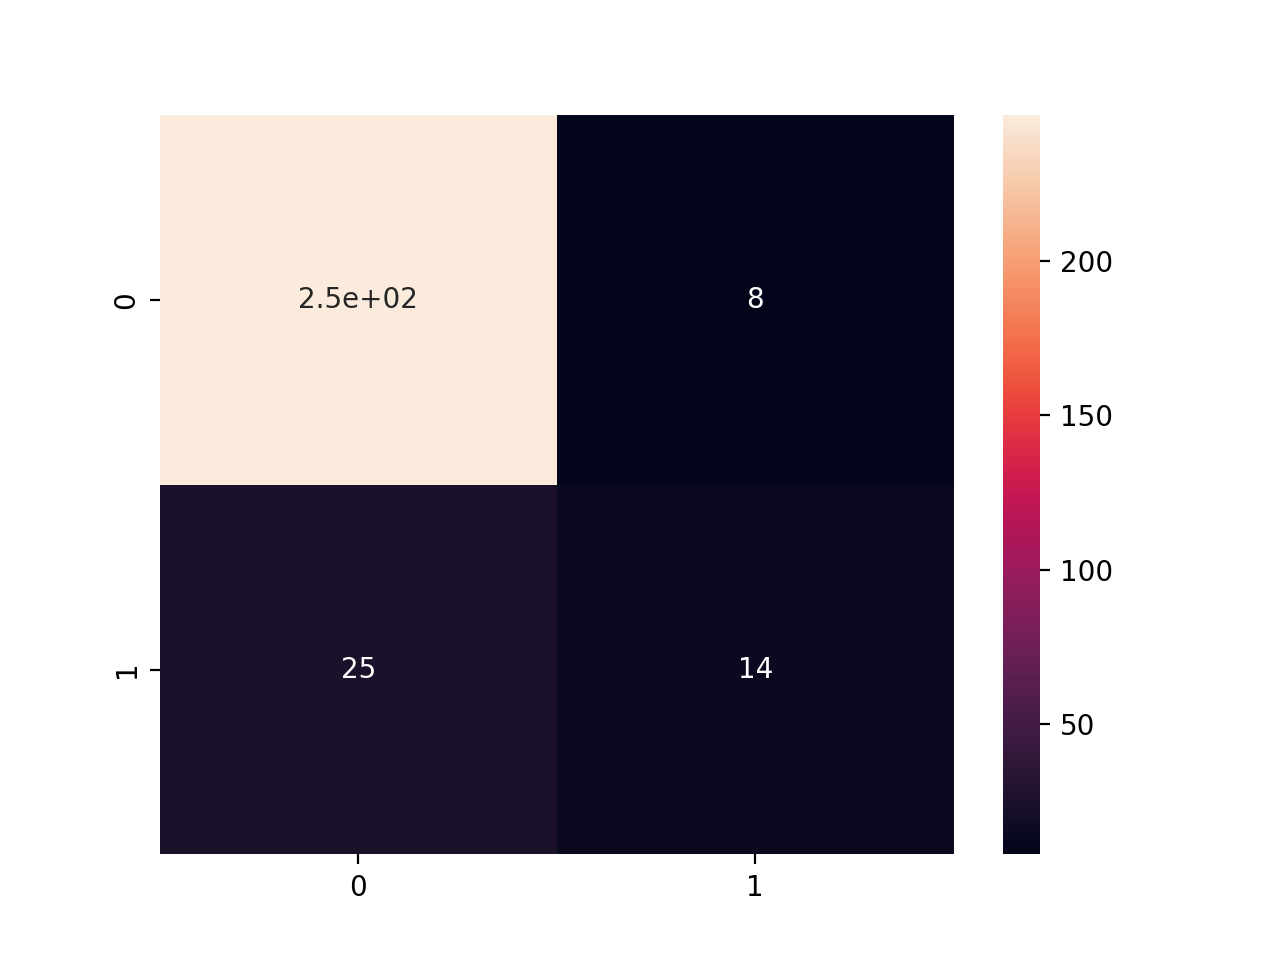

In [ ]:
#Confusion Matrix
import sklearn.metrics as metrics
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

10/10 [==============================] - 0s 3ms/step

Model: Simple Neural Network
Accuracy: 0.89
Confusion Matrix:
[[247   8]
 [ 25  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.64      0.36      0.46        39

    accuracy                           0.89       294
   macro avg       0.77      0.66      0.70       294
weighted avg       0.87      0.89      0.87       294

10/10 [==============================] - 0s 2ms/step
Area under ROC curve: 0.77


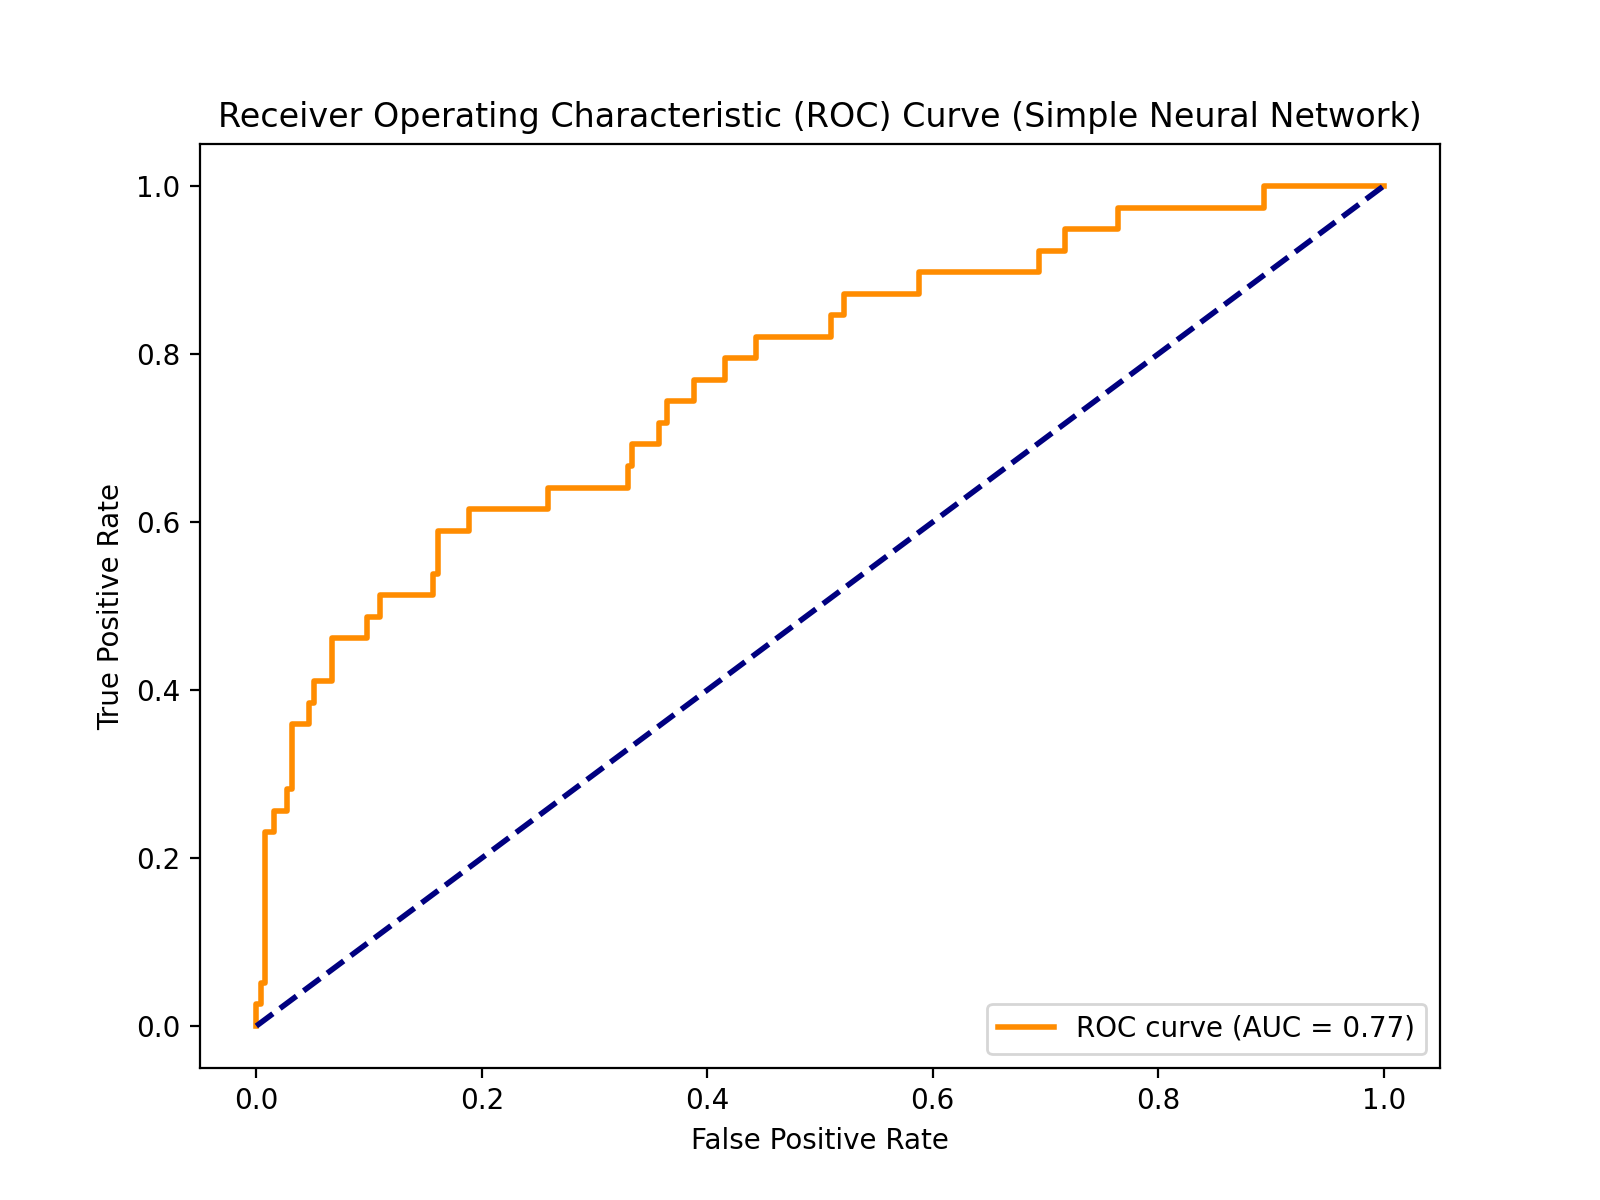

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_nn = (simple_nn_model.predict(X_test_scaled) > 0.5).astype(int)

# Evaluate the simple neural network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'\nModel: Simple Neural Network')
print(f'Accuracy: {accuracy_nn:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nn))
print('Classification Report:')
print(classification_report(y_test, y_pred_nn))

# Get predicted probabilities for the positive class (class 1)
y_prob_nn = simple_nn_model.predict(X_test_scaled)

# Calculate the ROC curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_prob_nn)

# Calculate the area under the ROC curve
roc_auc_nn = roc_auc_score(y_test, y_prob_nn)

# Print the results
print(f'Area under ROC curve: {roc_auc_nn:.2f}')

# Plot the ROC curve for the Simple Neural Network
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Simple Neural Network)')
plt.legend(loc='lower right')
plt.show()


The Accuracy of the ANN model is 85%.


**Feature Selection for Simple Neural Network**

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define the model-building function for hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32),
                           activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Defining the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust the number of trials as needed
    executions_per_trial=2,
    directory='my_tuning_dir',  # Set the directory for saving tuning logs and checkpoints
    project_name='my_nn_tuning')

# Performing the tuning
tuner.search(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

# Getting the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluating the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

# Getting the best hyperparameters
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print('Best Hyperparameters:', best_hyperparameters)


Trial 5 Complete [00h 00m 22s]
val_accuracy: 0.880952388048172

Best val_accuracy So Far: 0.8911564648151398
Total elapsed time: 00h 02m 05s
10/10 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8946
Test Accuracy: 0.8945578336715698
Best Hyperparameters: {'units': 32, 'learning_rate': 0.001}


After the feature Selection , The Accuracy of the ANN model is 90%.There has been a bit high increase after Tuning.

COMPLEX NEURAL NETWORK

In [ ]:
#Complex Neural network with three dense layers and one output layer
complex_nn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

complex_nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
complex_nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
y_pred = complex_nn_model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

10/10 [==============================] - 0s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel: Complex Neural Network')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Model: Complex Neural Network
Accuracy: 0.87
Confusion Matrix:
[[243  12]
 [ 25  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.54      0.36      0.43        39

    accuracy                           0.87       294
   macro avg       0.72      0.66      0.68       294
weighted avg       0.86      0.87      0.86       294

